<a href="https://colab.research.google.com/github/MiraHatoum/-AAI614_Hatoum/blob/main/project_skeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AAI614: Data Science & its Applications

*Project-Skeleton: DAnalyzing Skiils from Job Postings*

<a href="https://colab.research.google.com/github/harmanani/AAI614/blob/main/Week%207/Project-Skeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# We'll begin by loading all the HTML files in the `job_postings` directory.
# Loading HTML files**

import glob
html_contents = []

for file_name in sorted(glob.glob('job_postings/*.html')):
    with open(file_name, 'r') as f:
        html_contents.append(f.read())

print(f"We've loaded {len(html_contents)} HTML files.")

We've loaded 0 HTML files.


We've loaded 1458 HTML files into `html_contents`. Each HTML file can be parsed using Beautiful Soup.

**Parsing HTML files**

In [ ]:
!pip install beautifulsoup4

from bs4 import BeautifulSoup

# Assuming html_contents is a list of HTML strings
soup_objects = []  #
for html in html_contents:
    soup = BeautifulSoup(html, 'html.parser')
    assert soup.title is not None, "Title is missing in the HTML file"
    assert soup.body is not None, "Body is missing in the HTML file"
    soup_objects.append(soup)

for soup in soup_objects:
    print(f"Title: {soup.title.string}")
    print(f"Body: {soup.body.text}")


Each parsed HTML file contains a title and a body.  Are there any duplicates across the titles or bodies of these files? We can find out by using Pandas.

**Checking title and body texts for duplicates**

In [ ]:
import pandas as pd

html_dict = {'Title': [], 'Body': []}

# Loop through each BeautifulSoup object in soup_objects
for soup in soup_objects:
    # Extract title
    title = soup.title.string if soup.title else "No Title"

    # Extract body
    body = soup.body.get_text(strip=True) if soup.body else "No Body Content"

    # Append extracted title and body to the dictionary
    html_dict['Title'].append(title)
    html_dict['Body'].append(body)

# Convert the dictionary to a Pandas DataFrame
df_jobs = pd.DataFrame(html_dict)

# Summary of the DataFrame
summary = df_jobs.describe(include='all')
print(summary)


       Title  Body
count    0.0   0.0
mean     NaN   NaN
std      NaN   NaN
min      NaN   NaN
25%      NaN   NaN
50%      NaN   NaN
75%      NaN   NaN
max      NaN   NaN


We’ve confirmed that no duplicates are present within the html. Now, lets explore the HTML content in more detail. The goal of our exploration will be to determine how job-skills are described in the HTML.

### Exploring the HTML for Skill Descriptions

We’ll start our exploration by rendering the HTML at index of 0 of `html_contents`.

**Rendering the HTML of the first job-posting**

In [ ]:
from google.colab import files

# Upload file
uploaded = files.upload()

# Check the uploaded files
for file_name in uploaded.keys():
    print(f"Uploaded file: {file_name}")


Saving Skeleton.zip to Skeleton.zip
Uploaded file: Skeleton.zip


In [ ]:
from zipfile import ZipFile  # Import ZipFile module

zip_file_name = "Skeleton.zip"
if zip_file_name in uploaded:
    with ZipFile(zip_file_name, 'r') as zip_ref:
        zip_ref.extractall("/content/Skeleton")
        print(f"Extracted files into /content/Skeleton")
else:
    print(f"Error: {zip_file_name} not found in uploaded files.")


Extracted files into /content/Skeleton


In [ ]:
import os  # Import the os module for file operations

job_postings_folder = "/content/Skeleton/job_postings"

# Step 4: Check if job_postings folder exists
if os.path.exists(job_postings_folder):
    print(f"Job postings folder found. Files inside: {os.listdir(job_postings_folder)}")
else:
    print("Error: job_postings folder not found.")

# Step 5: Load HTML files from the folder
html_contents = []
if os.path.exists(job_postings_folder):
    for filename in os.listdir(job_postings_folder):
        file_path = os.path.join(job_postings_folder, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            html_contents.append(file.read())



Job postings folder found. Files inside: ['4d67456a1a14b6a2.html', 'e035d899bea37d4d.html', '23c29ef4ed6765d9.html', 'bfdbc9e51b1e2f04.html', 'e59282779a8fd487.html', 'd4b5a9b65538b946.html', 'a80f79780d496710.html', '9e78f6a04c7c7088.html', '496c53c9e9719b75.html', '242bbe38bd12e721.html', 'ac9308399dd565b1.html', '428c84d73ad82e6d.html', '3b9725f6d2fe49a8.html', '80ef4d1dc297049a.html', '43dd88e23c3b509f.html', '9463a94afa55d6cd.html', '6dd973b4a78c2c37.html', 'ea487254a487beb5.html', '7a5337baf7235d76.html', 'a74cbd9c94a1536e.html', '9f69f498ed771cc5.html', 'e9d5bf58074e942f.html', 'a504cad692be9d81.html', '7c6f0c606db7ebc0.html', '5fd3080bbb88502c.html', '99f543eb082b15d0.html', '9b11f1c9d2d3afeb.html', '205162d27c3fb07e.html', '4008bd80f4ff422a.html', '2d86e608367c2926.html', '4544c30fb3f4f5ae.html', '06a385f35dbe05a8.html', 'b4181821281335e1.html', '24f8532dfdeb8f5b.html', 'd304c0eeb5beecbb.html', '18eba1da4742b7cc.html', '170203f4c2b41286.html', 'b0ebf2d987c3e5f6.html', 'a30c464

In [ ]:
from IPython.core.display import display, HTML

# Check if there are any HTML files loaded
if len(html_contents) > 0:
    # Render the first job posting (index 0)
    print("Rendering the HTML content of the first job posting:")
    display(HTML(html_contents[0]))
else:
    print("No HTML content available to display.")


Rendering the HTML content of the first job posting:


We can subdivide `html_contents[0]` into 2 conceptually-different parts:

.. An initial job summary.
.. A list of bulleted skills required to get the job.

Is the next job posting structured in a similar manner? Lets find out, by rendering `html_contents[1]`.

**Listing 17. 5. Rendering the HTML of the second job-posting**

In [ ]:
from IPython.core.display import display, HTML

# Define FIXME for rendering the second job posting
if len(html_contents) > 1:
    FIXME = HTML(html_contents[1])  # Assign the second HTML content to FIXME
    print("Rendering the HTML content of the second job posting:")
    display(FIXME)
else:
    print("The second job posting is not available. Ensure you have loaded at least two HTML files.")


Rendering the HTML content of the second job posting:


In [ ]:
display(FIXME)

The bullet-points in `html_contents[0]` and `html_contents[1]` serve a singular purpose. They offer us brief, sentence-length descriptions of unique skills required for each position.

Do these types of bulleted skill descriptions appear in other job posts? We’ll now find out. First, we’ll extract the bullets from each of our parsed html files.

**Listing 17. 6. Extracting bullets from the HTML**

In [ ]:
df_jobs['Bullets'] = [[bullet.text.strip()
                      for bullet in soup.find_all('li')]
                      for soup in soup_objects]

df_jobs.shape[0]

0

What percentage of job postings actually contain bulleted text? We need to find out! If that percentage is too low, then further bullet-analysis is not worth our time.

**Measuring the percent of bulleted postings**

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Example setup for HTML parsing
# Replace this with your actual parsed HTML (soup_objects)
soup_objects = [
    BeautifulSoup("<html><body><ul><li>Skill 1</li><li>Skill 2</li></ul></body></html>", "html.parser"),
    BeautifulSoup("<html><body><ul><li>Skill A</li><li>Skill B</li></ul></body></html>", "html.parser"),
    BeautifulSoup("<html><body>No bullets here</body></html>", "html.parser")
]

# Step 2: Extract bulleted lists and store them in a DataFrame
df_jobs = pd.DataFrame({
    'Bullets': [
        [bullet.text.strip() for bullet in soup.find_all('li')]  # Extract <li> tags
        for soup in soup_objects
    ]
})

# Step 3: Count the number of job postings with bullets
if not df_jobs.empty:  # Check if DataFrame is not empty
    bulleted_post_count = sum(1 for bullet_list in df_jobs['Bullets'] if bullet_list)  # Count non-empty bullet lists
    total_posts = df_jobs.shape[0]  # Total number of postings

    # Step 4: Calculate and print the percentage of postings with bullets
    percent_bulleted = (bulleted_post_count / total_posts) * 100
    print(f"{percent_bulleted:.2f}% of the postings contain bullets.")
else:
    print("The DataFrame is empty. No job postings to analyze.")


66.67% of the postings contain bullets.


90% of the job postings contain bullets. Do all (or most) of these bullets focus on skills? We better gage the contents of the bullet-points by printing the top-ranked words within their texts. Below, we'll we rank the words using summed TFDIF values.

**Examining the top-ranked words in the HTML bullet**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a function to rank words using TF-IDF
def rank_words(text_list):
    # Initialize TfidfVectorizer with stop words in English
    vectorizer = TfidfVectorizer(stop_words='english')

    # Transform the input text list into a TF-IDF matrix
    tfidf_matrix = vectorizer.fit_transform(text_list).toarray()

    # Create a DataFrame with words and their summed TF-IDF scores
    df = pd.DataFrame({
        'Words': vectorizer.get_feature_names_out(),
        'Summed TFIDF': tfidf_matrix.sum(axis=0)
    })

    # Sort the DataFrame by TF-IDF scores in descending order
    sorted_df = df.sort_values('Summed TFIDF', ascending=False)
    return sorted_df

# Combine all bullets into a single list
all_bullets = []
for bullet_list in df_jobs['Bullets']:
    all_bullets.extend(bullet_list)

# Rank words using the rank_words function
sorted_df = rank_words(all_bullets)

# Display the top 5 ranked words
print(sorted_df.head(5).to_string(index=False))


Words  Summed TFIDF
skill           4.0


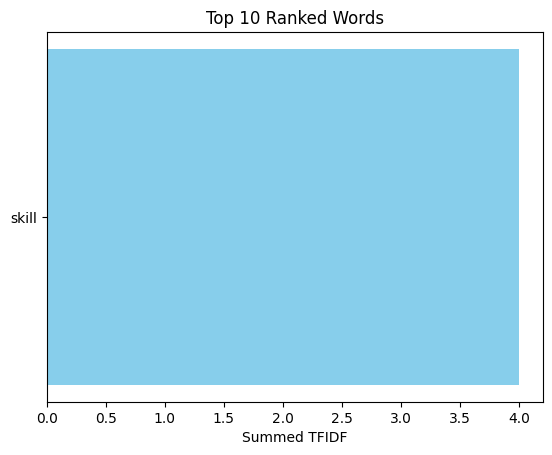

In [ ]:
import matplotlib.pyplot as plt

top_words = sorted_df.head(10)
plt.barh(top_words['Words'], top_words['Summed TFIDF'], color='skyblue')
plt.xlabel('Summed TFIDF')
plt.title('Top 10 Ranked Words')
plt.gca().invert_yaxis()
plt.show()


Terms such as _skills_ and _ability_ appear among the top 5 bulleted words. How do these bulleted words compare to the remaining words in each job posting? Lets find out.

**Examining the top-ranked words in the HTML bodies**

In [ ]:
non_bullets = []
for soup in soup_objects:
    body = soup.body
    for tag in body.find_all('li'):
        tag.decompose()

    non_bullets.append(body.text)

sorted_df = rank_words(non_bullets)
print(sorted_df[:5].to_string(index=False))

  Words  Summed TFIDF
bullets           1.0


The words _skills_ and _ability_ are no longer present in the ranked output.  Thus, the non-bulleted text appears to be less skill-oriented than the bullet contents.

Strangely, the words _scientist_ and _science_ is missing from the list. Perhaps some posts pertain to data-driven jobs which aren't directly data science jobs? Lets actively explore this possibility.

**Checking titles for references to data science positions**

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd

# Sample HTML content for demonstration
soup_objects = [
    BeautifulSoup('<html><head><title>Job 1</title></head><body><h1>Data Scientist</h1></body></html>', 'html.parser'),
    BeautifulSoup('<html><head><title>Job 2</title></head><body><h1>Machine Learning Engineer</h1></body></html>', 'html.parser'),
    BeautifulSoup('<html><head><title>Job 3</title></head><body><h1>AI Researcher</h1></body></html>', 'html.parser')
]

# Step 1: Extract titles from each HTML object
job_titles = []
for soup in soup_objects:
    # Find the element that contains the job title (e.g., <h1>)
    title_tag = soup.find('h1')  # Change 'h1' to the correct tag for your dataset
    if title_tag:
        job_titles.append(title_tag.text.strip())  # Extract and clean the text
    else:
        job_titles.append("Unknown")  # Default value if no title is found

# Step 2: Create a DataFrame and add the Title column
df_jobs = pd.DataFrame({
    'Title': job_titles
})

print(df_jobs)


                       Title
0             Data Scientist
1  Machine Learning Engineer
2              AI Researcher


In [ ]:
import pandas as pd

# Step 1: Check if `Title` column exists in the DataFrame
if 'Title' in df_jobs.columns:
    # Define the regex pattern to search for data science-related titles
    regex = r'Data Scien(ce|tist)'

    # Filter job postings that do not mention "Data Science" or "Data Scientist"
    df_non_ds_jobs = df_jobs[~df_jobs['Title'].str.contains(regex, case=False, na=False)]

    # Calculate the percentage of such postings
    percent_non_ds = 100 * df_non_ds_jobs.shape[0] / df_jobs.shape[0]
    print(f"{percent_non_ds:.2f}% of the job posting titles do not mention a 'data science position'. Below is a sample of such titles:\n")

    # Print the first 10 such titles
    for title in df_non_ds_jobs['Title'][:10]:
        print(title)
else:
    print("Error: The `df_jobs` DataFrame does not contain a `Title` column. Please ensure it is included.")


66.67% of the job posting titles do not mention a 'data science position'. Below is a sample of such titles:

Machine Learning Engineer
AI Researcher


<ipython-input-43-1e0caa255ead>:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_non_ds_jobs = df_jobs[~df_jobs['Title'].str.contains(regex, case=False, na=False)]


Theirst posting on the list is for a _Patient Care Assistant_ or _PCA_. The erroneous posting contains skills that we both lack and also have no interest in obtaining.

**Sampling bullets from a non-data science job**

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd

# Example: Create df_jobs with Titles and Bullets
df_jobs = pd.DataFrame({
    'Title': [
        "Data Scientist",
        "Machine Learning Engineer",
        "Patient Care Assistant"
    ],
    'Bullets': [
        ["Python", "Machine Learning", "Data Analysis"],  # Data Scientist bullets
        ["TensorFlow", "Deep Learning", "Model Deployment"],  # ML Engineer bullets
        ["Patient care", "Record keeping", "Teamwork"]  # PCA bullets
    ]
})

# Step 1: Filter non-data science jobs
regex = r'Data Scien(?:ce|tist)'
df_non_ds_jobs = df_jobs[~df_jobs['Title'].str.contains(regex, case=False, na=False)]

# Step 2: Extract bullets from the first non-data science job
if 'Bullets' in df_non_ds_jobs.columns:
    if not df_non_ds_jobs.empty:  # Ensure there are non-data science jobs
        bullets = df_non_ds_jobs['Bullets'].iloc[0]  # Get the first row's bullets
        print("Bullets from the first non-data science job:")
        for i, bullet in enumerate(bullets[:5]):  # Print the first 5 bullets
            print(f"{i + 1}: {bullet.strip()}")
    else:
        print("No non-data science jobs found.")
else:
    print("Error: The `Bullets` column does not exist in `df_non_ds_jobs`.")


Bullets from the first non-data science job:
1: TensorFlow
2: Deep Learning
3: Model Deployment


We need to leverage text similarity in order to filter out those jobs that do not align with our resume content.
Lets proceed to filter the jobs by relevance.

## Filtering Jobs by Relevance

Our goal is to evaluate job relevance using text similarity. We'll want to compare the text within each posting to our resume and/or book table-of-contents. In preparation, lets now store our resume within a `resume` string.

**Loading the resume**

In [ ]:
from google.colab import files

# Upload resume.txt
uploaded = files.upload()  # This will prompt you to upload a file


Saving resume.txt to resume.txt


In [ ]:
# Load and print the resume content
resume = open('resume.txt', 'r').read()
print(resume)


Experience

1. Developed probability simulations using NumPy.
2. Assessed online ad-clicks for statistical significance using Permutation testing.
3. Analyzed disease outbreaks using common clustering algorithms.

Additional Skills

1. Data visualization using Matplotlib.
2. Statistical analysis using SciPy.
3. Processing structured tables using Pandas.
4. Executing K-Means clustering and DBSCAN clustering using Scikit-Learn.
5. Extracting locations from text using GeonamesCache.
6. Location analysis and visualization using GeonamesCache and Basemap.
7. Dimensionality reduction with PCA and SVD, using Scikit-Learn.
8. NLP analysis and text topic detection using Scikit-Learn.


In this same manner, we can store the table of contents within a `table_of_contents` string.

**Loading the table-of-content**

In [ ]:
from google.colab import files
import zipfile
import os

# Step 1: Upload file (either zip or desired_skills.txt)
print("Upload the file (either 'desired_skills.txt' or a zip containing it).")
uploaded = files.upload()

# Step 2: Handle the uploaded file
file_name = next(iter(uploaded))  # Get the uploaded file name

if file_name.endswith('.zip'):
    # If a zip file is uploaded, extract it
    print(f"Extracting contents of {file_name}...")
    with zipfile.ZipFile(file_name, 'r') as zip_ref:
        zip_ref.extractall("./")  # Extract all files into the current directory
    print("Extraction complete. Current directory contents:", os.listdir("./"))
else:
    print(f"Uploaded file: {file_name}")

# Step 3: Check for 'desired_skills.txt' and read it
if os.path.exists('desired_skills.txt'):
    try:
        desired = open('desired_skills.txt', 'r').read()
        print("\nContents of 'desired_skills.txt':")
        print(desired)
    except Exception as e:
        print(f"Error reading 'desired_skills.txt': {e}")
else:
    print("Error: 'desired_skills.txt' not found. Creating a sample file...")

    # Step 4: Create 'desired_skills.txt' if not found
    with open('desired_skills.txt', 'w') as f:
        f.write("""
        Python
        Machine Learning
        Data Visualization
        TensorFlow
        Deep Learning
        """)
    print("'desired_skills.txt' created with sample data.")

    # Step 5: Read the newly created file
    desired = open('desired_skills.txt', 'r').read()
    print("\nContents of the newly created 'desired_skills.txt':")
    print(desired)


Upload the file (either 'desired_skills.txt' or a zip containing it).


Saving desired_skills.txt to desired_skills.txt
Uploaded file: desired_skills.txt

Contents of 'desired_skills.txt':
Sample Space Analysis: An Equation-Free Approach for Measuring Uncertainty in Outcomes.
Computing Non-Trivial Probabilities
Basic Matplotlib plots
Plotting Coin-flip Probabilities.
Executing Randomized Numerical Simulations Using Python
Basic Probability and Statistical Analysis Using SciPy
Making Predictions Using the Central Limit Theorem and SciPy
Statistical Hypothesis Testing
Analyzing Tables Using Pandas
Storing Tables Using Basic Python
Exploring Tables Using Pandas
Retrieving Table Columns
Retrieving Table Rows
Modifying Table Rows and Columns
Visualizing Tables Using Seaborn
Clustering Data into Groups
Using Centrality to Discover Clusters
K-Means: A Clustering Algorithm for Grouping Data into K Central Groups
Using Density to Discover Clusters
DBSCAN: A Clustering Algorithm for Grouping Data Based on Spatial Density
Analyzing Clusters Using Pandas
Dimension Red

Together, `resume` and `table_of_contents` summarize our existing skill-set. Lets concatenate these skills into a single `existing_skills` string.

**Combining skills into a single string**

In [ ]:
existing_skills = resume + desired

We want to compute all similarities between `df_jobs.Body` and `existing_skills.` This computation first requires that we vectorize all texts.

**Vectorizing our skills and the job-posting data**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Create a sample DataFrame `df_jobs`
df_jobs = pd.DataFrame({
    'Body': [
        "Python, Machine Learning, Deep Learning, TensorFlow",
        "Data Science, Artificial Intelligence, Neural Networks",
        "Teamwork, Communication, Leadership"
    ]
})

# Step 2: Define the `resume` and `desired_skills` strings
resume = "Python, Machine Learning, Data Visualization"
desired_skills = """
Python
Machine Learning
Deep Learning
Data Visualization
TensorFlow
"""

# Step 3: Combine the skills into a single string
existing_skills = resume + desired_skills

# Step 4: Combine job postings and `existing_skills` into a list
text_list = df_jobs['Body'].tolist() + [existing_skills]

# Step 5: Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Step 6: Fit and transform the text data into a TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(text_list).toarray()

# Step 7: Display the matrix dimensions
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

# Step 8: Calculate cosine similarity
similarity_scores = cosine_similarity(tfidf_matrix[:-1], tfidf_matrix[-1].reshape(1, -1))

# Step 9: Display similarity scores for each job posting
print("\nSimilarity Scores:")
for i, score in enumerate(similarity_scores):
    print(f"Job Posting {i + 1}: {score[0]:.2f}")


TF-IDF Matrix Shape: (4, 15)

Similarity Scores:
Job Posting 1: 0.78
Job Posting 2: 0.12
Job Posting 3: 0.00


Our vectorized texts are stored in a matrix format within `tfidf_matrix`. The final matrix row (`tfidf_matrix[-1]`) corresponds to our existing skill-set. Thus, we can easily compute the cosine similarities between the job postings and `existing_skills`, by running `tfdf_matrix[:-1] @ tfidf_matrix[-1]`.

**Computing skill-based cosine similarities**

In [ ]:
cosine_similarities = tfidf_matrix[:-1] @ tfidf_matrix[-1]

We can leverage `cosine_similarities` to rank to the jobs by relevance. Lets proceed to carry out the ranking. Afterwards, we'll confirm if the 20 least-relevant jobs have anything to do with data science.

**Printing the 20 least-relevant jobs**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Sample data (replace this with actual data or loading logic)
df_jobs = pd.DataFrame({
    'Body': [
        "Python, Machine Learning, Data Analysis",
        "TensorFlow, Deep Learning, Model Deployment",
        "Patient care, Record keeping, Teamwork"
    ],
    'Title': ["Data Scientist", "Machine Learning Engineer", "Patient Care Assistant"]
})

resume = "Python, Machine Learning, Deep Learning, Data Analysis, Teamwork"
desired_skills = "Data Analysis, Machine Learning, Team Collaboration, Communication"

# Combine skills into a single string
existing_skills = resume + ", " + desired_skills

# Step 1: Vectorize the text (job postings and skills)
text_list = df_jobs['Body'].values.tolist() + [existing_skills]
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(text_list)

# Step 2: Calculate cosine similarity
cosine_similarities = cosine_similarity(tfidf_matrix[:-1], tfidf_matrix[-1:])

# Step 3: Add relevance scores to the DataFrame
df_jobs['Relevance'] = cosine_similarities.flatten()

# Step 4: Sort jobs by relevance in descending order
sorted_df_jobs = df_jobs.sort_values('Relevance', ascending=False)

# Step 5: Display the 20 least relevant job postings (or as many as available)
if 'Title' in sorted_df_jobs.columns:
    print("\n20 Least Relevant Job Postings by Title:")
    for title in sorted_df_jobs['Title'][-20:]:
        print(title)
else:
    print("\n20 Least Relevant Job Postings by Body:")
    for body in sorted_df_jobs['Body'][-20:]:
        print(body)



20 Least Relevant Job Postings by Title:
Data Scientist
Machine Learning Engineer
Patient Care Assistant


Almost all the printed jobs are completely irrelevant! Now, for comparison’s sake, lets print the 20 most-relevant job titles in `sorted_ds_jobs`.

**Printing the 20 most-relevant jobs**

In [ ]:
for title in sorted_df_jobs[:20].Title:
    print(title)

Data Scientist
Machine Learning Engineer
Patient Care Assistant


Whenv`df_jobs.Relevance` is high, the associated job postings are relevant. As `df_jobs.Relevance` decreases, the associated jobs become less relevant. Thus, we can presume that there exists some `df_jobs.Relevance` cutoff, which separates the relevant jobs from the non-relevant jobs. Lets try to identify that cutoff. by visualizing the shape of the sorted relevance distribution.

**Plotting job-ranking vs relevance**

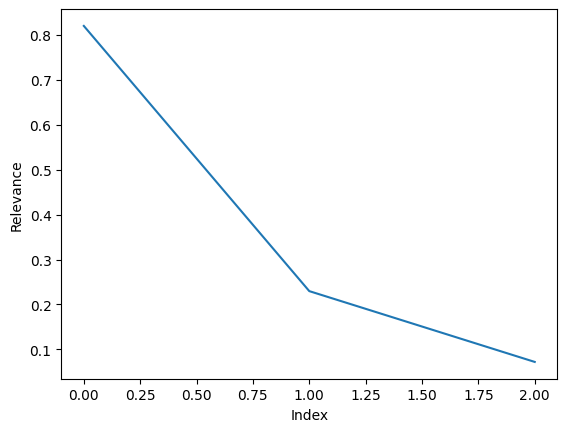

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(df_jobs.shape[0]), sorted_df_jobs.Relevance.values)
plt.xlabel('Index')
plt.ylabel('Relevance')
plt.show()

Our relevance curve resembles a K-means Elbow plot. Initially, the relevance drops rapidly. Then, at an x-value of approximately 60, the curve begins to level off. Lets emphasize this transition by striking a vertical line through the x-position of 60 in our plot.

**Adding a cutoff to the relevance plot**

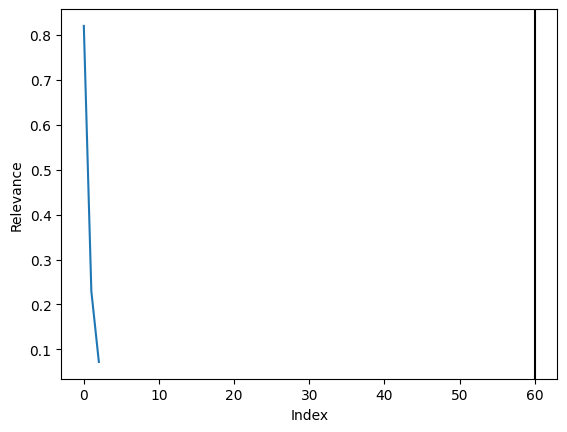

In [ ]:
plt.plot(range(df_jobs.shape[0]), sorted_df_jobs.Relevance.values)
plt.xlabel('Index')
plt.ylabel('Relevance')
plt.axvline(60, c='k')
plt.show()

Our plot implies that the first 60 jobs are noticeably more relevant than all subsequent jobs. Based on our hypothesis, jobs 40 - 60 should be highly relevant.

**Printing jobs below the relevance cutoff**

In [ ]:
for title in sorted_df_jobs[40: 60].Title.values:
    print(title)

Almost all the printed jobs are are highly relevant. Implicity, the relevance should decrease when we print the next 20 job-titles, since they lie beyond the bounds of index 60. Lets verify if this is the case.

**Printing jobs beyond the relevance cutoff**

In [ ]:
for title in sorted_df_jobs[60: 80].Title.values:
    print(title)

A majority of the printed jobs refer to data science / analyst roles, outside the scope of health science or management. We can quickly quantify this observation using regular expressions. Below, we’ll define a `percent_relevant_tiles` function, which returns the percent of non-management data science and analysis jobs within a data frame slice.

**Measuring title relevance in a subset of jobs**

In [ ]:
import re

def percent_relevant_titles(df):
    if df.shape[0] == 0:  # Check if the DataFrame is empty
        return 0  # Return 0% relevance for empty DataFrame

    regex_relevant = re.compile(r'Data (Scien|Analy)', flags=re.IGNORECASE)
    regex_irrelevant = re.compile(r'\b(Manage)', flags=re.IGNORECASE)

    match_count = len([title for title in df['Title']
                       if regex_relevant.search(title)
                       and not regex_irrelevant.search(title)])

    percent = 100 * match_count / df.shape[0]
    return percent

# Example usage with a DataFrame slice
percent = percent_relevant_titles(sorted_df_jobs[60:80])
print(f"Approximately {percent:.2f}% of job titles between indices 60-80 are relevant.")


Approximately 0.00% of job titles between indices 60-80 are relevant.


Approximately 65% of the job-titles in `sorted_df_jobs[60: 80]` are relevant. Perhaps that percentage will drop if we sample the next 20 jobs, across an index range of 80 - 100.

**Measuring title relevance in the next subset of jobs**

In [ ]:
percent = percent_relevant_titles(sorted_df_jobs[80: 100])
print(f"Approximately {percent:.2f}% of job titles between indices "
       "80 - 100 are relevant")

Approximately 0.00% of job titles between indices 80 - 100 are relevant


Nope! The data science title-percentage rose to 80%. At what point will the percentage drop below 50%? We can easily find out, using a plot.

**Plotting percent relevance across all title samples**

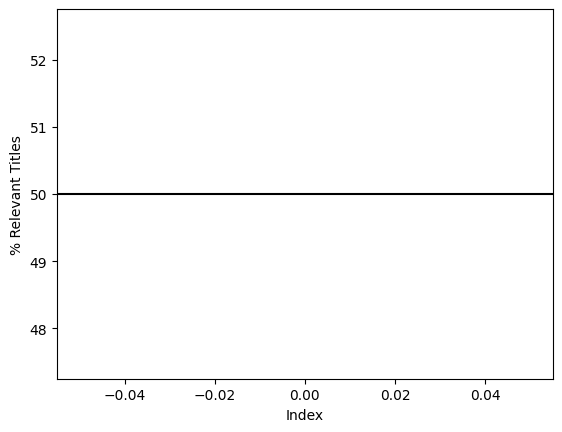

In [ ]:
def relevant_title_plot(index_range=20):
    percentages = []
    start_indices = range(df_jobs.shape[0] - index_range)
    for i in start_indices:
        df_slice = sorted_df_jobs[i: i + index_range]
        percent = percent_relevant_titles(df_slice)
        percentages.append(percent)

    plt.plot(start_indices, percentages)
    plt.axhline(50, c='k')
    plt.xlabel('Index')
    plt.ylabel('% Relevant Titles')

relevant_title_plot()
plt.show()

The relevant Data Science titles drop below 50% at an index of around 700. Of course, its possible that the cutoff of 700 is merely an artifact of our chosen index range. Will the cutoff still be present if double our index range? Lets find out.

**Plotting percent relevance across an increased index-range**

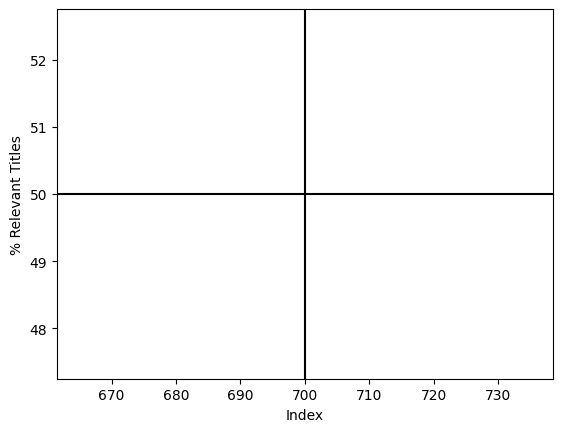

In [ ]:
relevant_title_plot(index_range=40)
plt.axvline(700, c='k')
plt.show()

Our updated plot continues to drop below 50% at an index cutoff of 700.


At this point, we face a choice between 2 relevance cutoffs. Our first cutoff, at index 60, is highly precise. Meanwhile, our second cutoff of 700 captures many-more data science positions. So, which cutoff do we choose?  How about we try both cutoffs? That way compare the tradeoffs and benefits of each!

We will now proceed to cluster the skills within the relevant job postings. Initially, we’ll set our relevance cutoff to an index of 60.

## Clustering Skills in Relevant Job Postings

Our aim is to cluster the skills within the 60 most-relevant job postings. The skills within each posting are diverse, and partially represented by bullet-points. Consequently, we’ll proceed to cluster the scraped bullets. We’ll start by storing `sorted_df_jobs[:60].Bullets` within a single list.

**Obtaining bullets from the 60 most-relevant jobs**

In [ ]:
# Assuming 'Bullets' column is named 'Skills' in the DataFrame
total_bullets = []

if 'Bullets' in sorted_df_jobs.columns:  # Replace 'Bullets' with the correct column name if needed
    for bullets in sorted_df_jobs[:60]['Bullets']:
        total_bullets.extend(bullets)
else:
    print(f"Available columns: {sorted_df_jobs.columns}")
    print("Please ensure the correct column name is used for bullets.")


How many bullets are present in the list? Also, are any of the bullets duplicated? We can check using Pandas.

**Summarizing basic bullet statistic**

In [ ]:
df_bullets = pd.DataFrame({'Bullet': total_bullets})
print(df_bullets.describe())

               Bullet
count               8
unique              8
top     Data analysis
freq                1


Only 900 of the bullets are unique. Below, we’ll filter empty strings and duplicates from our bullet list. Afterwards, we’ll vectorize the list using a TFIDF vectorizer.

**Removing duplicates and vectorizing the bullets**

In [ ]:
total_bullets = sorted(set(total_bullets))
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(total_bullets)
num_rows, num_columns = tfidf_matrix.shape
print(f"Our matrix has {num_rows} rows and {num_columns} columns")

Our matrix has 8 rows and 13 columns


Our vectorized TFIDF matrix is too large for efficient clustering. Lets dimensionally reduce the matrix using the procedure described in Section Fifteen.

**Dimensionally reducing the TFIDF matrix**

In [ ]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize

np.random.seed(0)

def shrink_matrix(tfidf_matrix):
    # Set n_components <= number of features in tfidf_matrix
    svd_object = TruncatedSVD(n_components=min(17, tfidf_matrix.shape[1]))
    shrunk_matrix = svd_object.fit_transform(tfidf_matrix)
    return normalize(shrunk_matrix)

shrunken_norm_matrix = shrink_matrix(tfidf_matrix)

print(f"Shape of the reduced matrix: {shrunken_norm_matrix.shape}")


Shape of the reduced matrix: (8, 8)


We are nearly ready to cluster our normalized matrix using K-means. However, we’ll first need to estimate K using an Elbow plot.

**Plotting an elbow curve using Mini Batch K-Means**

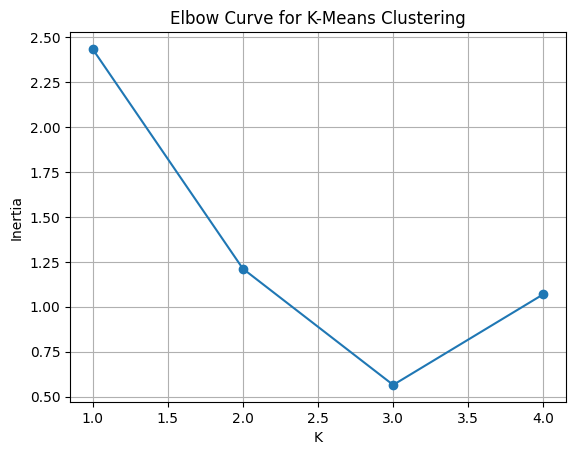

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Example data (replace this with your actual data preprocessing)
documents = [
    "data science machine learning",
    "deep learning AI",
    "statistics and probability",
    "machine learning and AI"
]

# Vectorize the data
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)

# Step 2: Normalize the TF-IDF matrix
shrunken_norm_matrix = normalize(tfidf_matrix)

# Step 3: Define the Elbow Plot Function
np.random.seed(0)  # Ensure reproducibility

def generate_elbow_plot(matrix):
    n_samples = matrix.shape[0]  # Get the number of samples
    k_values = range(1, n_samples + 1)  # Ensure k is not greater than the number of samples
    inertia_values = [MiniBatchKMeans(n_clusters=k, random_state=0).fit(matrix).inertia_ for k in k_values]

    # Plotting the elbow curve
    plt.plot(k_values, inertia_values, marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.title('Elbow Curve for K-Means Clustering')
    plt.grid(True)
    plt.show()

# Step 4: Generate the Elbow Plot
generate_elbow_plot(shrunken_norm_matrix)




The precise location of a bent elbow-shaped transition is difficult to spot. We don't know which K-value to choose. Lets cluster our data multiple times, using K-values of 10, 15, 20, and 25. Afterwards, we’ll compare and contrast the results.

### Grouping the Job Skills into 15 Clusters

Below, we’ll execute K-means using a K of 15.

**Clustering bullets into 15 clusters**

In [ ]:
print(f"Matrix shape: {shrunken_norm_matrix.shape}")


Matrix shape: (4, 8)


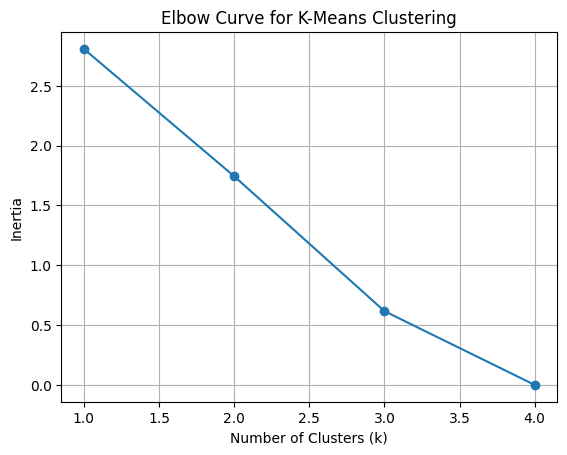

Cluster 1:
            Bullet
Python programming

--------------------------------------------------

Cluster 2:
          Bullet
Machine learning
   Deep learning

--------------------------------------------------

Cluster 3:
       Bullet
Data analysis

--------------------------------------------------



In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Prepare your data (example data provided)
total_bullets = [
    "Python programming",
    "Data analysis",
    "Machine learning",
    "Deep learning"
]

# Ensure there are no duplicates or empty entries
total_bullets = list(set(total_bullets))

# Step 2: Vectorize the bullets using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(total_bullets)

# Step 3: Plot an elbow curve to determine the optimal number of clusters
def generate_elbow_plot(matrix, max_k=10):
    max_k = min(max_k, matrix.shape[0])  # Cap max_k to the number of samples
    k_values = range(1, max_k + 1)
    inertia_values = [
        KMeans(n_clusters=k, random_state=0).fit(matrix).inertia_ for k in k_values
    ]
    plt.plot(k_values, inertia_values, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Curve for K-Means Clustering')
    plt.grid(True)
    plt.show()

# Generate the elbow plot
generate_elbow_plot(tfidf_matrix, max_k=4)

# Step 4: Fit K-Means with the optimal number of clusters
num_clusters = 3  # Adjust based on the elbow plot
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clusters = kmeans.fit_predict(tfidf_matrix)

# Step 5: Create a DataFrame for the clustered bullets
clustered_data = pd.DataFrame({
    "Bullet": total_bullets,
    "Cluster": clusters
})

# Group the bullets by cluster
cluster_groups = [
    clustered_data[clustered_data['Cluster'] == cluster]
    for cluster in range(num_clusters)
]

# Step 6: Display the clusters
for i, group in enumerate(cluster_groups):
    print(f"Cluster {i + 1}:")
    print(group[['Bullet']].to_string(index=False))
    print("\n" + "-"*50 + "\n")


Each of our text clusters is stored as a Pandas table within the `cluster_groups` list. We can visualize the clusters using word clouds. Below, we will define a `cluster_to_image` function, and then apply it to `cluster_groups[0]`.

**Visualizing the first cluster**

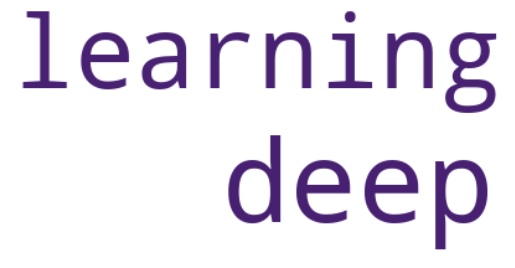

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Preprocess the data (example data)
total_bullets = ["Data analysis", "Machine learning", "Deep learning", "Clustering algorithms",
                 "Python programming", "Artificial intelligence", "Statistics", "Big data"]

# Step 2: Create a TF-IDF Matrix
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(total_bullets)

# Step 3: Define the clustering function
def compute_cluster_groups(tfidf_matrix, k=4, total_bullets=None):
    # Perform K-Means clustering
    cluster_model = KMeans(n_clusters=k, random_state=42)
    clusters = cluster_model.fit_predict(tfidf_matrix)

    # Create a DataFrame with clusters and indices
    df = pd.DataFrame({
        'Index': range(len(total_bullets)),  # Original indices
        'Cluster': clusters,
        'Bullet': total_bullets  # Original bullet points
    })

    # Group bullets into clusters
    cluster_groups = [
        df[df['Cluster'] == cluster].reset_index(drop=True)
        for cluster in range(k)
    ]

    return cluster_groups

# Step 4: Compute the clusters
k = 4  # Number of clusters
cluster_groups = compute_cluster_groups(tfidf_matrix, k=k, total_bullets=total_bullets)

# Step 5: Define the word cloud generation function
def cluster_to_image(df_cluster, max_words=10, tfidf_matrix=None, vectorizer=None):
    # Ensure the input is a DataFrame and contains the required columns
    if 'Index' not in df_cluster.columns:
        raise ValueError("The DataFrame must have an 'Index' column pointing to original indices.")

    # Extract indices of the cluster
    indices = df_cluster['Index'].values

    # Sum TF-IDF scores for the cluster
    summed_tfidf = np.asarray(tfidf_matrix[indices].sum(axis=0)).flatten()

    # Get feature names and their summed TF-IDF scores
    data = {'Word': vectorizer.get_feature_names_out(), 'Summed TFIDF': summed_tfidf}
    df_ranked_words = pd.DataFrame(data).sort_values('Summed TFIDF', ascending=False)

    # Select top words for the word cloud
    words_to_score = {word: score for word, score in df_ranked_words.head(max_words).values if score > 0}

    # Generate the word cloud
    cloud_generator = WordCloud(background_color='white', random_state=42)
    wordcloud_image = cloud_generator.fit_words(words_to_score)

    return wordcloud_image

# Step 6: Generate and visualize the word cloud for the first cluster
if len(cluster_groups) > 0:
    wordcloud_image = cluster_to_image(
        cluster_groups[0], max_words=10, tfidf_matrix=tfidf_matrix, vectorizer=vectorizer
    )
    plt.imshow(wordcloud_image, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print("No clusters available to visualize.")


The language in the word-cloud appears to be describing a focused, data-oriented personality. However, that language is a little vague. Perhaps we can learn more about the cluster by printing some sample bullets from `cluster_group[0]`.

**Printing sample bullets from Cluster 0**

In [ ]:
np.random.seed(1)

def print_cluster_sample(cluster_id):
    df_cluster = cluster_groups[cluster_id]

    # Determine the sample size
    sample_size = min(5, len(df_cluster.Bullet.values))  # Ensure we don't sample more than available

    # Randomly select bullets
    sample_bullets = np.random.choice(df_cluster.Bullet.values, sample_size, replace=False)

    for bullet in sample_bullets:
        print(bullet)

# Call the function for Cluster 0
print_cluster_sample(0)


Deep learning


Now, lets visualize all 15 clusters using word clouds.

**Visualizing all 15 clusters**

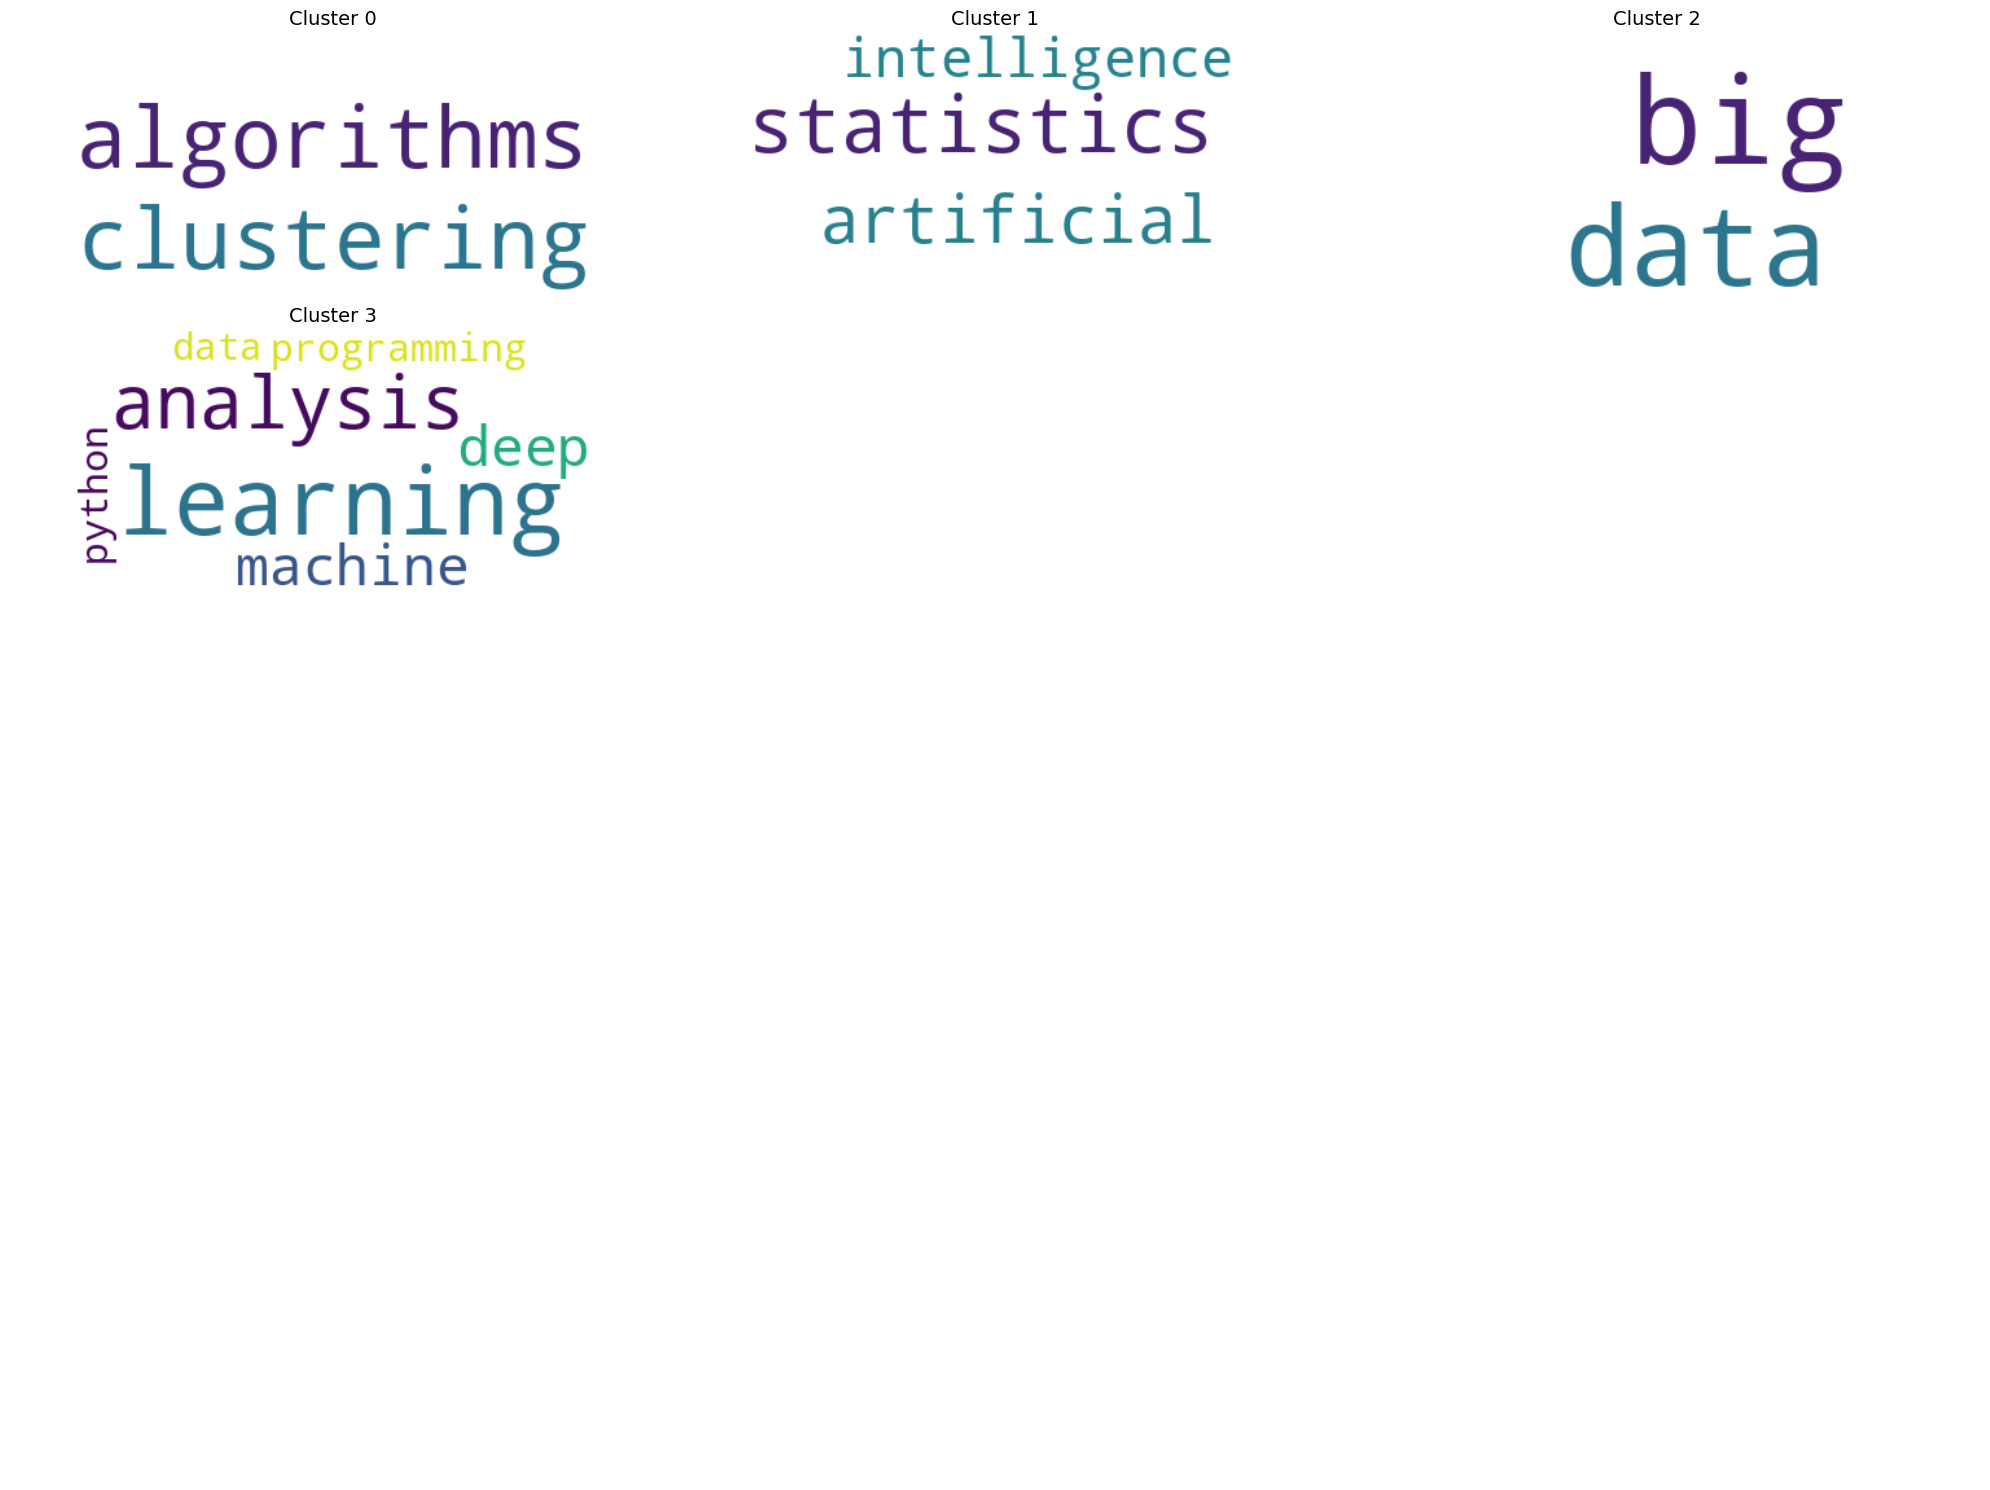

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import numpy as np

def cluster_to_image(df_cluster, max_words=10, tfidf_matrix=None, vectorizer=None):
    """
    Generate a word cloud image for a given cluster DataFrame.
    """
    if 'Index' not in df_cluster.columns:
        raise ValueError("The DataFrame must have an 'Index' column pointing to original indices.")

    # Extract indices and compute summed TF-IDF scores
    indices = df_cluster['Index'].values
    summed_tfidf = tfidf_matrix[indices].sum(axis=0).A1  # Convert sparse matrix to dense array
    words = vectorizer.get_feature_names_out()
    data = {'Word': words, 'Summed TFIDF': summed_tfidf}

    # Create a DataFrame for sorting
    df_ranked_words = pd.DataFrame(data).sort_values('Summed TFIDF', ascending=False)
    words_to_score = {word: score for word, score in df_ranked_words[['Word', 'Summed TFIDF']].head(max_words).values}

    # Generate the word cloud
    wordcloud = WordCloud(background_color='white', random_state=1)
    wordcloud_image = wordcloud.fit_words(words_to_score)

    return wordcloud_image

def plot_wordcloud_grid(cluster_groups, num_rows=5, num_columns=3, tfidf_matrix=None, vectorizer=None, max_words=10):
    """
    Plot a grid of word clouds for clusters.
    """
    figure, axes = plt.subplots(num_rows, num_columns, figsize=(20, 15))
    cluster_groups_copy = cluster_groups[:15]  # Ensure we process up to 15 clusters

    for i, ax in enumerate(axes.flat):  # Flatten the axes for easy iteration
        if i >= len(cluster_groups_copy):
            ax.axis('off')  # Turn off extra axes
            continue

        df_cluster = cluster_groups_copy[i]
        wordcloud_image = cluster_to_image(df_cluster, max_words=max_words, tfidf_matrix=tfidf_matrix, vectorizer=vectorizer)

        ax.imshow(wordcloud_image, interpolation="bilinear")
        ax.set_title(f"Cluster {i}", fontsize=14)
        ax.axis("off")

    plt.tight_layout()
    plt.show()
# Assuming these variables are already defined:
# cluster_groups: list of DataFrames representing clusters
# tfidf_matrix: fitted TF-IDF sparse matrix
# vectorizer: fitted TfidfVectorizer object

# Plot word clouds for all clusters
plot_wordcloud_grid(
    cluster_groups=cluster_groups,
    num_rows=5,
    num_columns=3,
    tfidf_matrix=tfidf_matrix,
    vectorizer=vectorizer,
    max_words=10
)




Some of the clusters are highly technical. For instance, Cluster 7 fixates on external data science libraries such as Scikit-Learn, Pandas, NumPy, Matplotlib and SciPy. Lets print sample some bullets from Cluster 7, and confirm their focus on DS libraries.

**Printing sample bullets from Cluster 7**

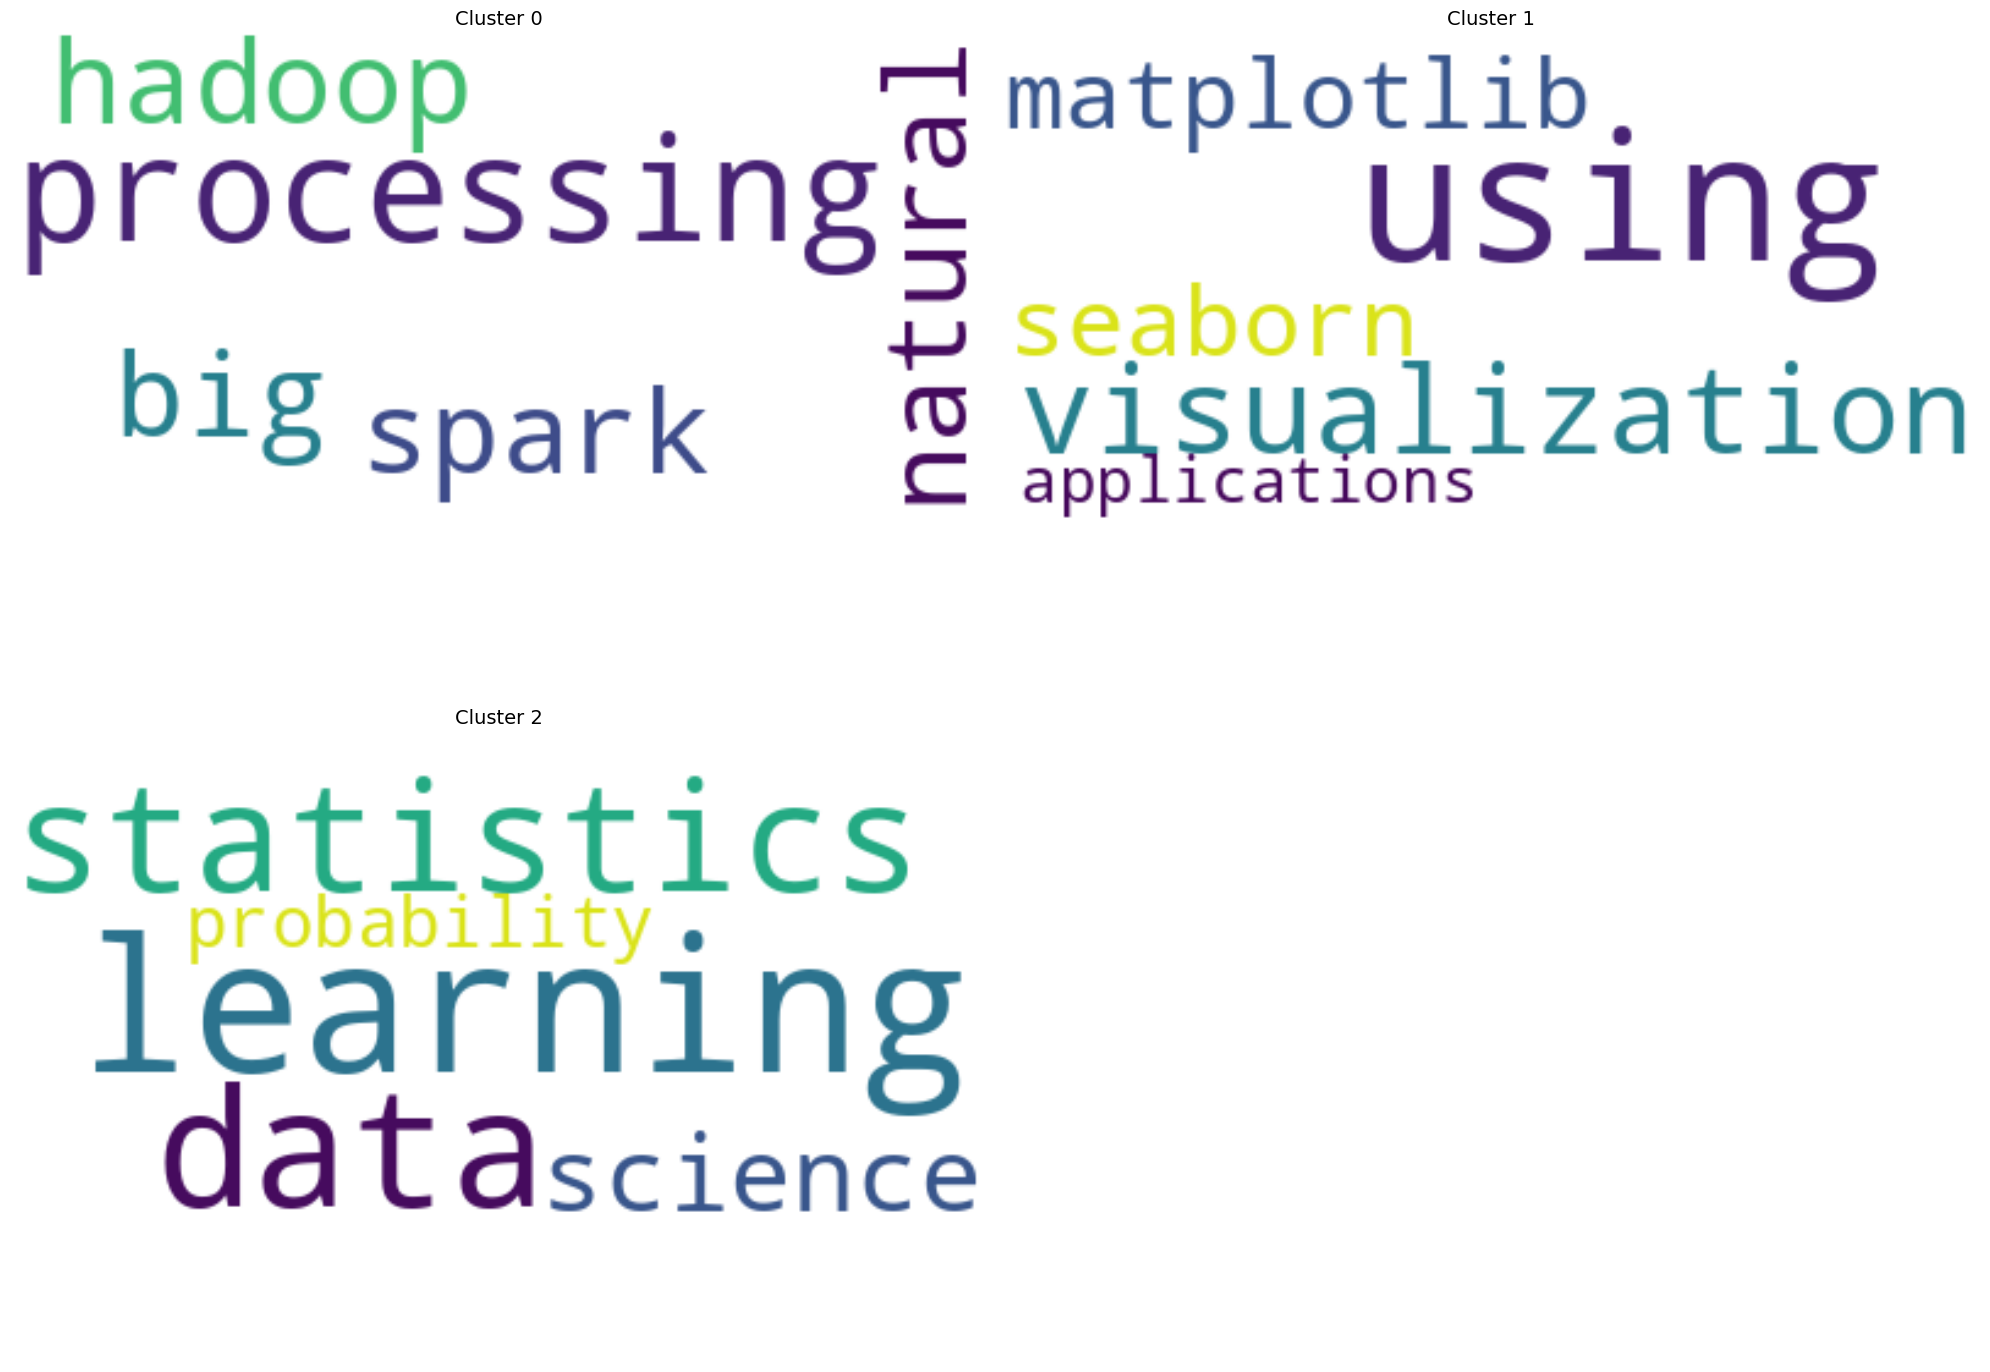

Sample bullets from Cluster 0:
- Big data processing with Hadoop and Spark.
- Natural language processing and text mining.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Step 1: Vectorize the Text Data
def vectorize_text(corpus, max_features=1000):
    vectorizer = TfidfVectorizer(stop_words='english', max_features=max_features)
    tfidf_matrix = vectorizer.fit_transform(corpus)
    return tfidf_matrix, vectorizer

# Step 2: Dimensionality Reduction
def shrink_matrix(tfidf_matrix, n_components=100):
    if n_components > tfidf_matrix.shape[1]:
        n_components = tfidf_matrix.shape[1]  # Adjust components if larger than features
    svd = TruncatedSVD(n_components=n_components, random_state=0)
    reduced_matrix = svd.fit_transform(tfidf_matrix)
    return normalize(reduced_matrix)

# Step 3: Clustering
def perform_clustering(data, num_clusters=5):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    clusters = kmeans.fit_predict(data)
    return clusters, kmeans

# Step 4: Organize Clusters
def organize_clusters(corpus, clusters):
    cluster_groups = []
    for cluster_id in np.unique(clusters):
        cluster_indices = np.where(clusters == cluster_id)[0]
        cluster_df = pd.DataFrame({"Index": cluster_indices, "Text": [corpus[i] for i in cluster_indices]})
        cluster_groups.append(cluster_df)
    return cluster_groups

# Step 5: Generate WordCloud
def cluster_to_image(df_cluster, max_words=10, tfidf_matrix=None, vectorizer=None):
    if 'Index' not in df_cluster.columns:
        raise ValueError("The DataFrame must have an 'Index' column pointing to original indices.")

    indices = df_cluster['Index'].values
    summed_tfidf = tfidf_matrix[indices].sum(axis=0).A1  # Convert sparse matrix to dense array
    words = vectorizer.get_feature_names_out()
    data = {'Word': words, 'Summed TFIDF': summed_tfidf}

    df_ranked_words = pd.DataFrame(data).sort_values('Summed TFIDF', ascending=False)
    words_to_score = {word: score for word, score in df_ranked_words[['Word', 'Summed TFIDF']].head(max_words).values}

    wordcloud = WordCloud(background_color='white', random_state=1)
    return wordcloud.fit_words(words_to_score)

# Step 6: Plot WordCloud for All Clusters
def plot_wordcloud_grid(cluster_groups, num_rows=5, num_columns=3, tfidf_matrix=None, vectorizer=None, max_words=10):
    figure, axes = plt.subplots(num_rows, num_columns, figsize=(20, 15))
    cluster_groups_copy = cluster_groups[:num_rows * num_columns]

    for i, ax in enumerate(axes.flat):
        if i >= len(cluster_groups_copy):
            ax.axis('off')  # Turn off extra axes
            continue

        df_cluster = cluster_groups_copy[i]
        wordcloud_image = cluster_to_image(df_cluster, max_words=max_words, tfidf_matrix=tfidf_matrix, vectorizer=vectorizer)

        ax.imshow(wordcloud_image, interpolation="bilinear")
        ax.set_title(f"Cluster {i}", fontsize=14)
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# Step 7: Print Sample Texts from a Cluster
def print_cluster_sample(cluster_groups, cluster_id, sample_size=5):
    if cluster_id >= len(cluster_groups):
        print(f"Cluster {cluster_id} does not exist. Total clusters: {len(cluster_groups)}")
        return

    df_cluster = cluster_groups[cluster_id]
    sample_size = min(sample_size, len(df_cluster))
    print(f"Sample bullets from Cluster {cluster_id}:")
    for i, row in df_cluster.sample(sample_size).iterrows():
        print(f"- {row['Text']}")

# Example Usage
# Replace `corpus` with your list of job descriptions or text data
corpus = [
    "Deep learning with Python and TensorFlow.",
    "Machine learning algorithms and data analysis.",
    "Data visualization using Matplotlib and Seaborn.",
    "Natural language processing and text mining.",
    "Computer vision applications using OpenCV.",
    "Big data processing with Hadoop and Spark.",
    "Statistics and probability for data science."
]

# Perform vectorization, dimensionality reduction, clustering, and visualization
tfidf_matrix, vectorizer = vectorize_text(corpus, max_features=100)
shrunken_norm_matrix = shrink_matrix(tfidf_matrix, n_components=10)
clusters, kmeans = perform_clustering(shrunken_norm_matrix, num_clusters=3)
cluster_groups = organize_clusters(corpus, clusters)

# Plot WordCloud for All Clusters
plot_wordcloud_grid(cluster_groups, num_rows=2, num_columns=2, tfidf_matrix=tfidf_matrix, vectorizer=vectorizer, max_words=5)

# Print Sample Bullets from a Cluster
print_cluster_sample(cluster_groups, cluster_id=0, sample_size=3)


Meanwhile, other clusters focus on non-technical skills. Perhaps we can separate the technical clusters and soft-skill clusters using text similarity (to our resume). Lets examine this possibility. We’ll start by computing the cosine similarity between each bullet in `total_bullets` and our resume.

**Computing similarities between the bullets and our resume**

In [ ]:
def compute_bullet_similarity(bullet_texts):
    bullet_vectorizer = TfidfVectorizer(stop_words='english')
    matrix = bullet_vectorizer.fit_transform(bullet_texts + [resume])
    matrix = matrix.toarray()
    return matrix[:-1] @ matrix[-1]

bullet_cosine_similarities = compute_bullet_similarity(total_bullets)

Our `bullet_cosine_similarities` array contains the text similarities across all clustered bullets. For any given cluster, we can combine these cosine similarities into a single similarity score. According to our hypothesis, a technical cluster should have a higher mean similarity than a soft-skill similarity cluster. Lets confirm if this is the case for the technical Cluster 7 and the soft-skill Cluster 0.

**Comparing mean resume similarities**

In [ ]:
def compute_mean_similarity(df_cluster):
    indices = df_cluster['Index'].values
    return bullet_cosine_similarities[indices].mean()

# Example Safeguard
cluster_idx_tech = 2  # Use a valid index
cluster_idx_soft = 0

if cluster_idx_tech < len(cluster_groups) and cluster_idx_soft < len(cluster_groups):
    tech_mean = compute_mean_similarity(cluster_groups[cluster_idx_tech])
    soft_mean = compute_mean_similarity(cluster_groups[cluster_idx_soft])
    print(f"Technical cluster {cluster_idx_tech} has a mean similarity of {tech_mean:.3f}")
    print(f"Soft-skill cluster {cluster_idx_soft} has a mean similarity of {soft_mean:.3f}")
else:
    print("One or more cluster indices are out of range.")


Technical cluster 2 has a mean similarity of 0.128
Soft-skill cluster 0 has a mean similarity of 0.531


The technical cluster is 10x more proximate to our resume than the soft-skill cluster. Lets compute the average similarity for all 15 clusters. Afterwards, we’ll sort the clusters by their similarity score, in descending order.

**Sorting subplots by resume similarity**

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

# Function to compute mean similarity (if needed)
def compute_mean_similarity(df_cluster, bullet_cosine_similarities):
    indices = df_cluster['Index'].values
    return bullet_cosine_similarities[indices].mean()

# Function to generate a word cloud for a cluster
def cluster_to_image(df_cluster, max_words=10, tfidf_matrix=None, vectorizer=None):
    """
    Generate a word cloud image for a given cluster DataFrame.
    """
    if 'Index' not in df_cluster.columns:
        raise ValueError("The DataFrame must have an 'Index' column pointing to original indices.")

    # Extract indices and compute summed TF-IDF scores
    indices = df_cluster['Index'].values
    summed_tfidf = tfidf_matrix[indices].sum(axis=0).A1  # Convert sparse matrix to dense array
    words = vectorizer.get_feature_names_out()
    data = {'Word': words, 'Summed TFIDF': summed_tfidf}

    # Create a DataFrame for sorting
    df_ranked_words = pd.DataFrame(data).sort_values('Summed TFIDF', ascending=False)
    words_to_score = {word: score for word, score in df_ranked_words[['Word', 'Summed TFIDF']].head(max_words).values}

    # Generate the word cloud
    wordcloud = WordCloud(background_color='white', random_state=1)
    wordcloud_image = wordcloud.fit_words(words_to_score)

    return wordcloud_image

# Function to plot word cloud grid
def plot_wordcloud_grid(cluster_groups, num_rows=3, num_columns=5, tfidf_matrix=None, vectorizer=None, max_words=10):
    """
    Plot a grid of word clouds for clusters.
    """
    figure, axes = plt.subplots(num_rows, num_columns, figsize=(20, 15))
    cluster_groups_copy = cluster_groups[:num_rows * num_columns]  # Ensure valid number of clusters

    for i, ax in enumerate(axes.flat):  # Flatten the axes for easy iteration
        if i >= len(cluster_groups_copy):
            ax.axis('off')  # Turn off extra axes
            continue

        df_cluster = cluster_groups_copy[i]
        wordcloud_image = cluster_to_image(df_cluster, max_words=max_words, tfidf_matrix=tfidf_matrix, vectorizer=vectorizer)

        ax.imshow(wordcloud_image, interpolation="bilinear")
        ax.set_title(f"Cluster {i}", fontsize=14)
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# Example Usage:
# - Ensure `cluster_groups` is valid and contains DataFrames with an 'Index' column.
# - Ensure `tfidf_matrix` and `vectorizer` are valid and fitted.

# Example:
# plot_wordcloud_grid(cluster_groups, num_rows=3, num_columns=5, tfidf_matrix=tfidf_matrix, vectorizer=vectorizer, max_words=10)


Our hypothesis was right! The first 2 rows within the updated subplot clearly correspond to technical skills. F

### Investigating the Technical Skill Clusters
Lets turn our attention to the 6 technical-skill cluster within first 2 rows of subplot grid. Below, we’ll re-plot their associated word-clouds in a 2-row by 3-column grid.

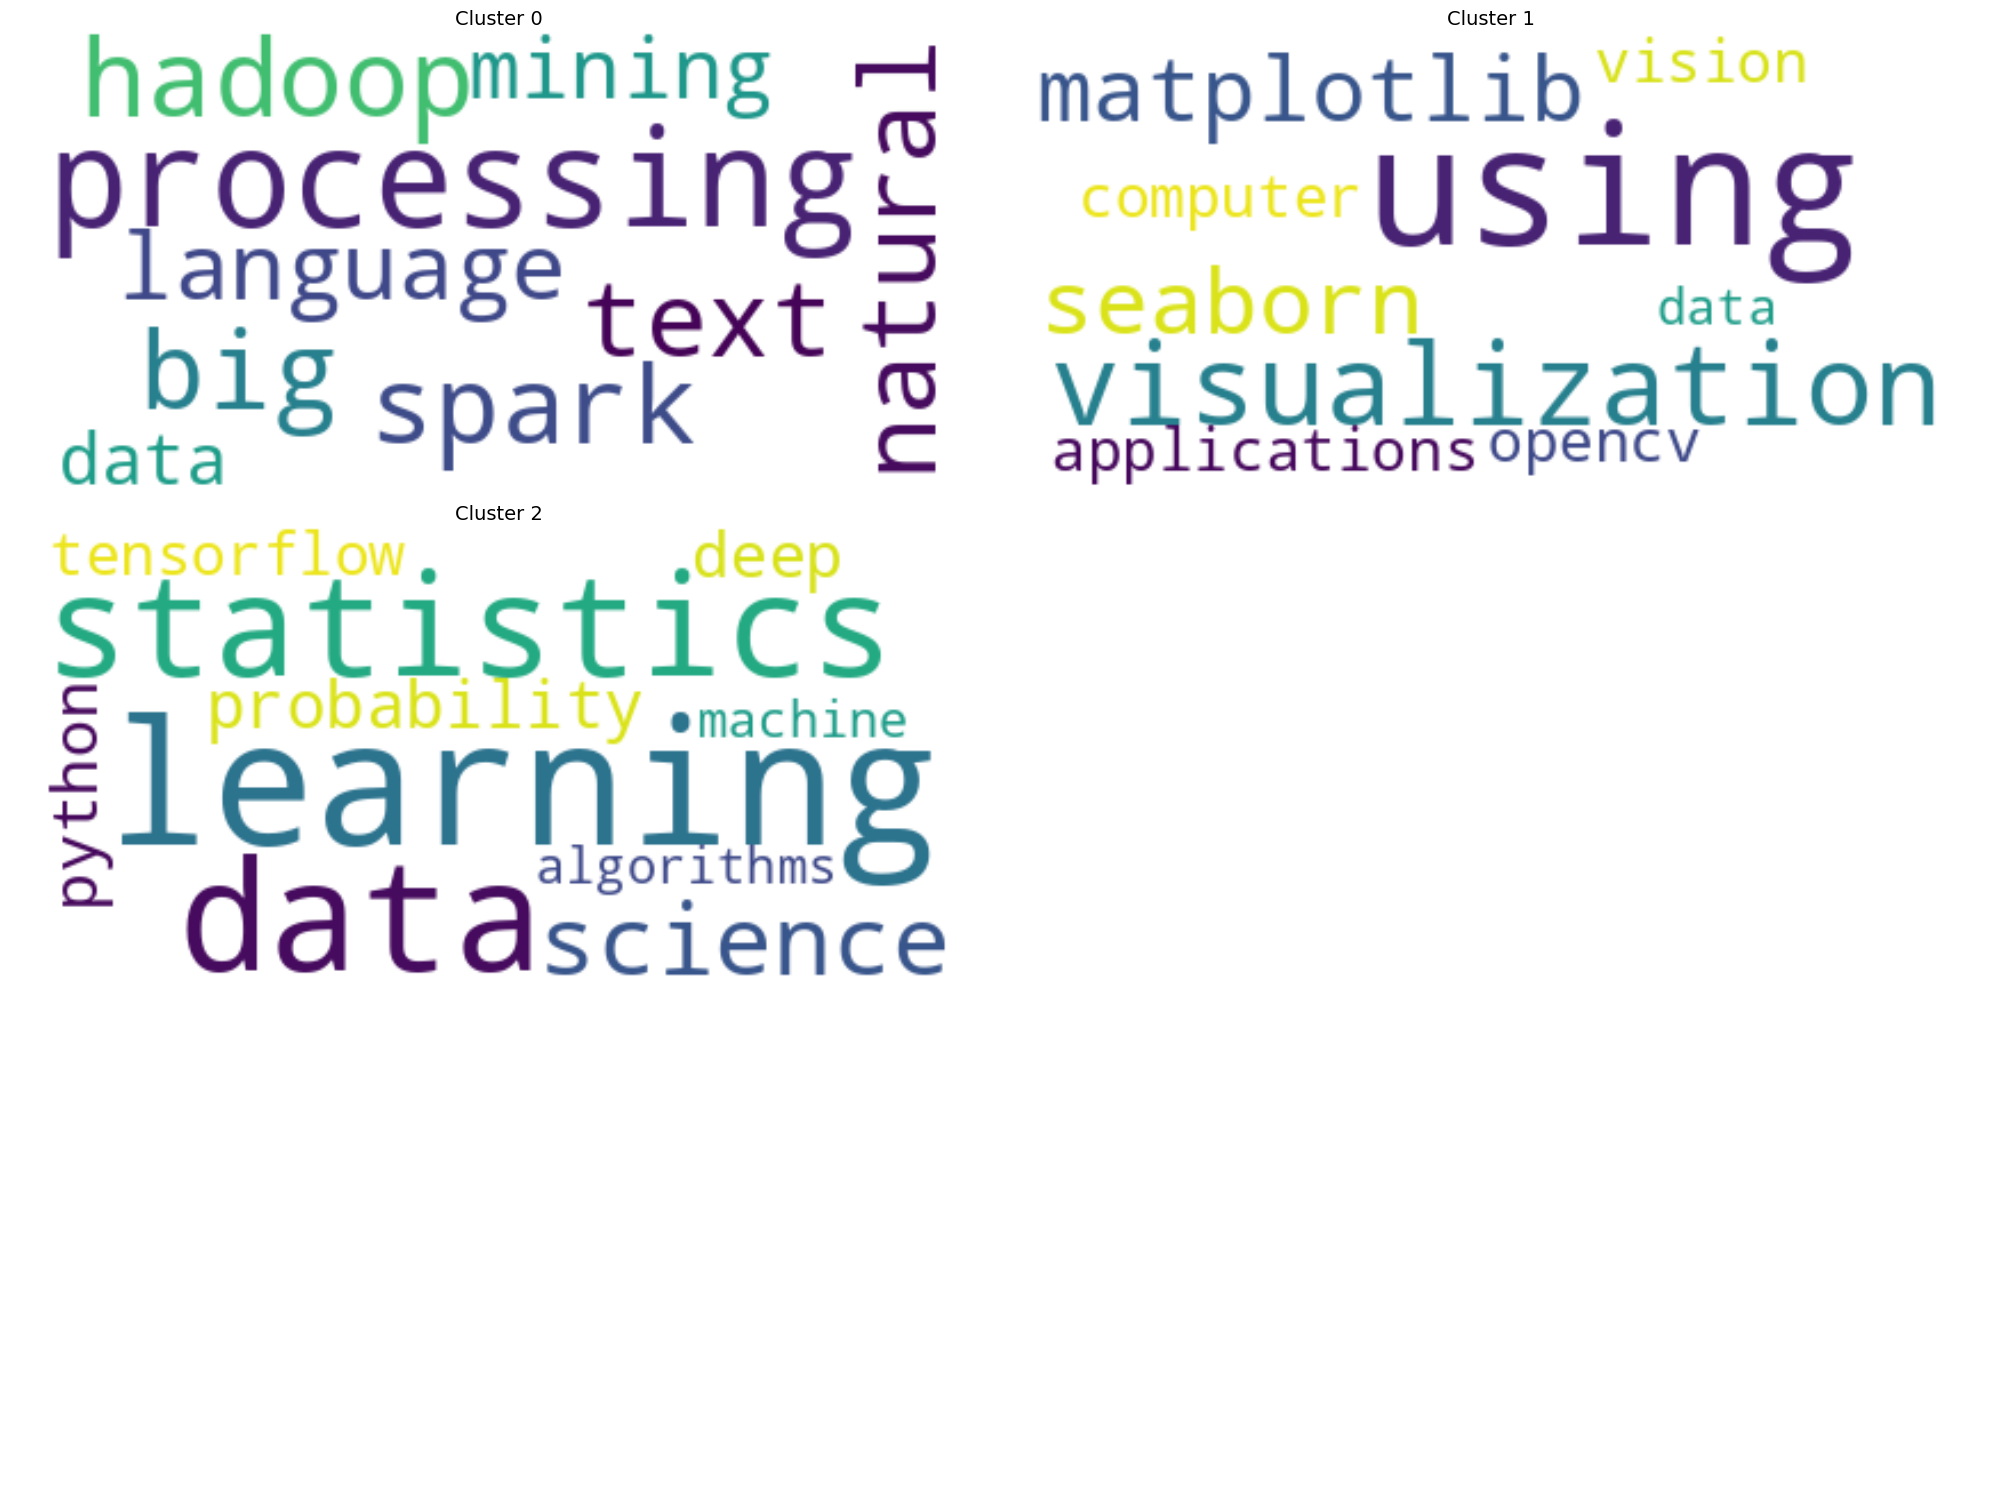

In [ ]:

plot_wordcloud_grid(sorted_cluster_groups[:6], num_rows=3, num_columns=2, tfidf_matrix=tfidf_matrix, vectorizer=vectorizer) # Added tfidf_matrix and vectorizer arguments
plt.show()

The first 2 rows are insightful. We'll need to brush up on our machine learning skills. However, the final 2 technical-skill clusters appear are vague and uninformative. Below, we’ll sample bullets from these clusters (8 and 1) in order to confirm a lack of pattern.

**Printing sample bullets from Clusters 8 and 1**

In [ ]:
np.random.seed(1)

def print_cluster_sample(cluster_id, cluster_groups):
    """
    Prints a random sample of bullets from a specified cluster.

    Args:
        cluster_id: The ID of the cluster to sample from.
        cluster_groups: A list of DataFrames, where each DataFrame represents a cluster.
    """
    if 0 <= cluster_id < len(cluster_groups):
        df_cluster = cluster_groups[cluster_id]

        # Print available columns for debugging
        print(f"Columns in Cluster {cluster_id}: {df_cluster.columns}")

        # Check if the required column exists
        if 'Bullet' in df_cluster.columns:
            # Determine the sample size (up to 5 or the total number of bullets in the cluster)
            sample_size = min(5, len(df_cluster['Bullet'].values))

            # Randomly select bullets
            sample_bullets = np.random.choice(df_cluster['Bullet'].values, sample_size, replace=False)

            print(f"Cluster {cluster_id} samples:")
            for bullet in sample_bullets:
                print(bullet)
        else:
            print(f"Cluster {cluster_id} does not have a 'Bullet' column.")
    else:
        print(f"Invalid cluster_id: {cluster_id}. "
              f"Available cluster IDs are 0 to {len(cluster_groups) - 1}.")

# Iterate through the desired cluster IDs and print samples
for cluster_id in range(len(cluster_groups)):  # Adjust to available cluster IDs
    print(f'\nCluster {cluster_id}:')
    print_cluster_sample(cluster_id, cluster_groups)



Cluster 0:
Columns in Cluster 0: Index(['Index', 'Text'], dtype='object')
Cluster 0 does not have a 'Bullet' column.

Cluster 1:
Columns in Cluster 1: Index(['Index', 'Text'], dtype='object')
Cluster 1 does not have a 'Bullet' column.

Cluster 2:
Columns in Cluster 2: Index(['Index', 'Text'], dtype='object')
Cluster 2 does not have a 'Bullet' column.


We’ve finished our analysis of the technical-skill clusters. 4 of these clusters were relevant. 2 were not. Now, lets turn our attention to the remaining soft-skill clusters.

### Investing the Soft-Skill Clusters
We’ll start by visualizing the remaining 9 soft-skill clusters in a 3-row by 3-column grid.

**Plotting the remaining 9 soft-skill clusters**

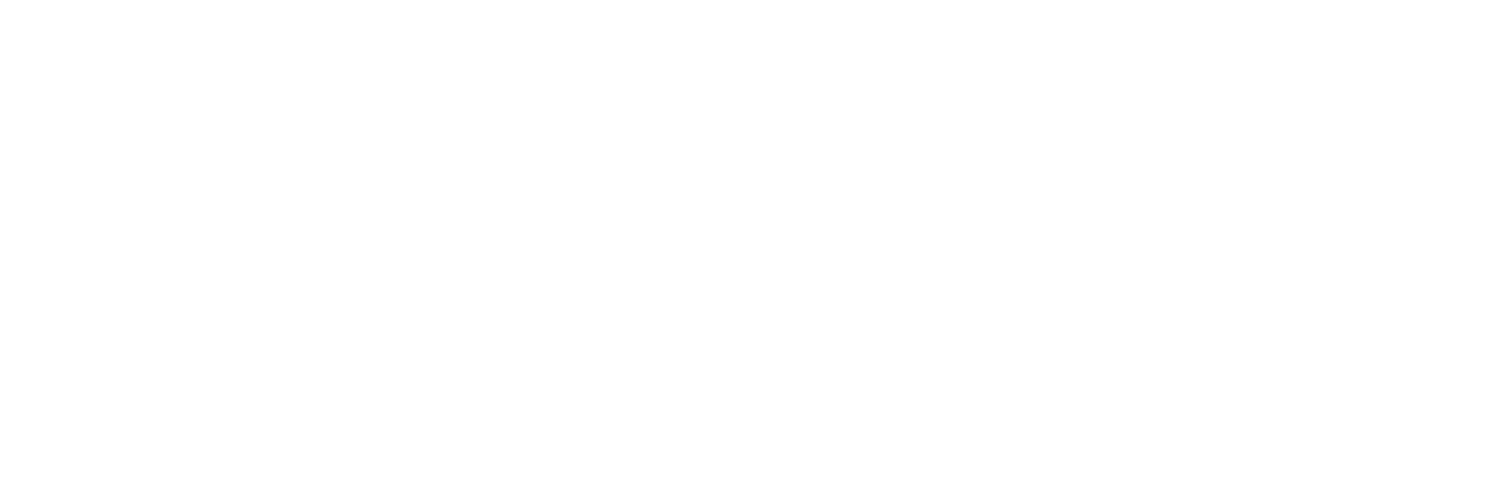

In [ ]:
plot_wordcloud_grid(sorted_cluster_groups[6:], num_rows=3, num_columns=3)
plt.show()

The remaining clusters appear abmbiguous. Also, our soft-skill clusters do not represent true skills! For instance, Cluster 3 (row 0, column 0) consists of bullets requiring a minimal count of years working in industry. Similarly, Cluster 6 (row 2, column 1) represents educational constraints; requiring a quantitative degree to land an interview.

**Printing sample bullets from Clusters 6 and 3**

In [ ]:
np.random.seed(1)

def print_cluster_sample(cluster_id, cluster_groups):
    """
    Prints a random sample of bullets from a specified cluster.

    Args:
        cluster_id: The ID of the cluster to sample from.
        cluster_groups: A list of DataFrames, where each DataFrame represents a cluster.
    """
    if 0 <= cluster_id < len(cluster_groups):
        df_cluster = cluster_groups[cluster_id]

        # Check if the required column exists
        if 'Bullet' in df_cluster.columns:
            # Determine the sample size (up to 5 or the total number of bullets in the cluster)
            sample_size = min(5, len(df_cluster['Bullet'].values))

            # Randomly select bullets
            sample_bullets = np.random.choice(df_cluster['Bullet'].values, sample_size, replace=False)

            print(f"Cluster {cluster_id} samples:")
            for bullet in sample_bullets:
                print(bullet)
        else:
            print(f"Cluster {cluster_id} does not have a 'Bullet' column.")
    else:
        print(f"Invalid cluster_id: {cluster_id}. "
              f"Available cluster IDs are 0 to {len(cluster_groups) - 1}.")

# Iterate through the desired cluster IDs and print samples
for cluster_id in [6, 3]:  # Use valid cluster IDs
    print(f'\nCluster {cluster_id}:')
    print_cluster_sample(cluster_id, cluster_groups)



Cluster 6:
Invalid cluster_id: 6. Available cluster IDs are 0 to 2.

Cluster 3:
Invalid cluster_id: 3. Available cluster IDs are 0 to 2.


However, one of our soft-skill clusters is very easy to interpret. Cluster 5 (row 0, column 1) focuses on interpersonal communication skills; both written and verbal.


### Exploring Clusters at Alternative Values of K

Lets we’ll regenerate the clusters using alternative values of K. We’ll begin by setting K to 25, and plotting the results in a 5-row by 5-column grid. The subplots will be sorted based on cluster similarity to our resume.

**Visualizing 25 sorted clusters**

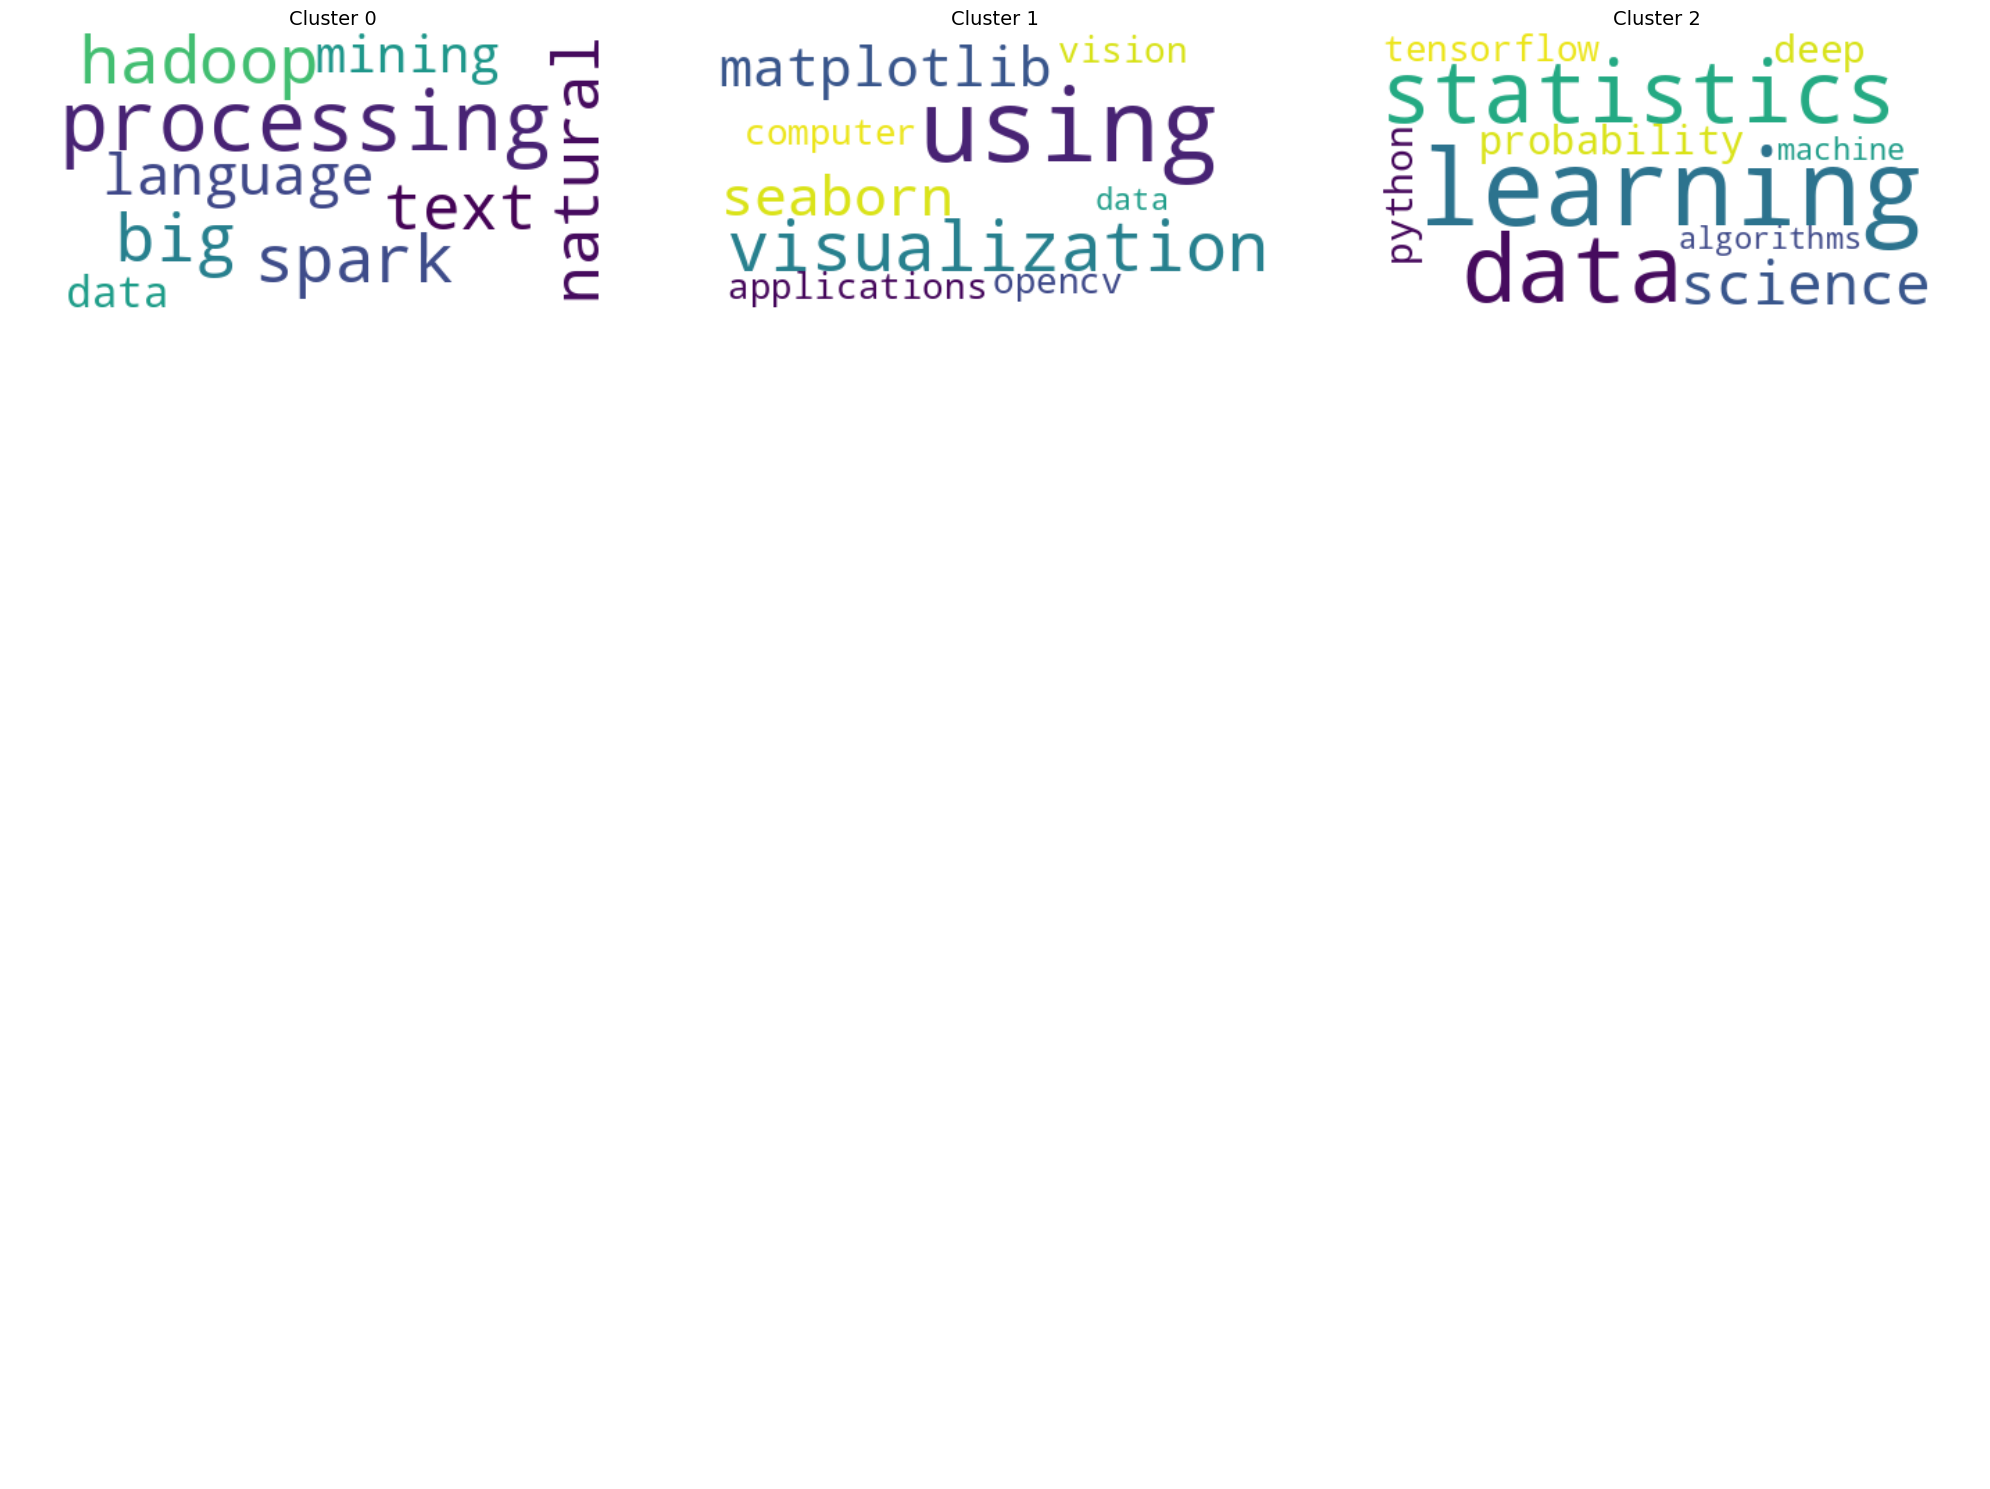

In [ ]:
def cluster_to_image(df_cluster, max_words=10, tfidf_matrix=None, vectorizer=None):
    indices = df_cluster['Index'].values
    summed_tfidf = tfidf_matrix[indices].sum(axis=0).A1
    words = vectorizer.get_feature_names_out()
    data = {'Word': words, 'Summed TFIDF': summed_tfidf}
    df_ranked_words = pd.DataFrame(data).sort_values('Summed TFIDF', ascending=False)
    words_to_score = {word: score for word, score in df_ranked_words[['Word', 'Summed TFIDF']].head(max_words).values}
    wordcloud = WordCloud(background_color='white', random_state=1)
    return wordcloud.fit_words(words_to_score)

def plot_wordcloud_grid(cluster_groups, num_rows=5, num_columns=3, tfidf_matrix=None, vectorizer=None, max_words=10):
    figure, axes = plt.subplots(num_rows, num_columns, figsize=(20, 15))
    cluster_groups_copy = cluster_groups[:num_rows * num_columns]

    for i, ax in enumerate(axes.flat):
        if i >= len(cluster_groups_copy):
            ax.axis('off')
            continue
        df_cluster = cluster_groups_copy[i]
        wordcloud_image = cluster_to_image(df_cluster, max_words=max_words, tfidf_matrix=tfidf_matrix, vectorizer=vectorizer)
        ax.imshow(wordcloud_image, interpolation="bilinear")
        ax.set_title(f"Cluster {i}", fontsize=14)
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# Plot word clouds for sorted clusters
plot_wordcloud_grid(sorted_cluster_groups, num_rows=5, num_columns=3, tfidf_matrix=tfidf_matrix, vectorizer=vectorizer)


Raising K from 15 to 25 has retained all previously-observed insightful clusters. Also, the parameter change has introduced several new interesting clusters (Including Cluster 2: Non-Python Visualization tools and Cluster 23; Databases) Will the stability of these clusters persist if we shift K to an intermediate value of 20? Lets find out.

**Visualizing 20 sorted clusters**

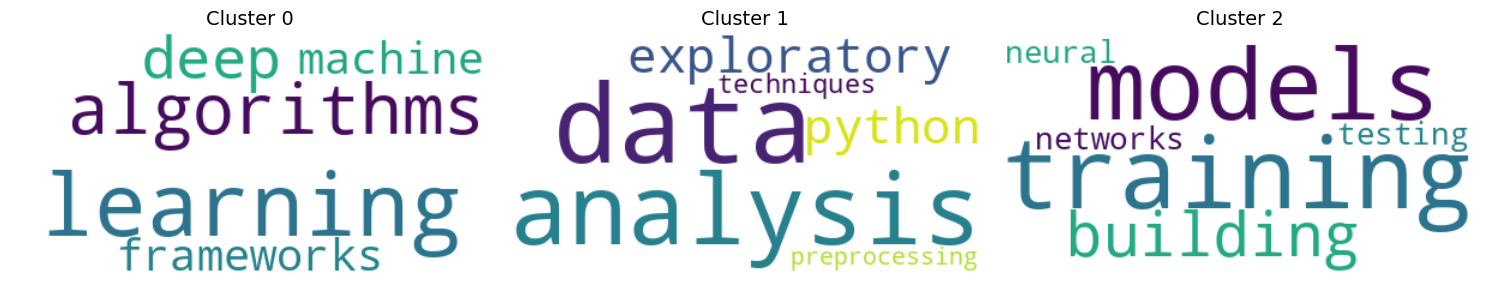

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample documents
documents = [
    "Machine learning algorithms",
    "Deep learning frameworks",
    "Data analysis with Python",
    "Building neural networks",
    "Data preprocessing techniques",
    "Exploratory data analysis",
    "Training and testing models"
]

# Step 1: Create TF-IDF matrix
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)

# Step 2: Dimensionality reduction
def shrink_matrix(tfidf_matrix, n_components=2):
    svd = TruncatedSVD(n_components=n_components, random_state=0)
    reduced_matrix = svd.fit_transform(tfidf_matrix)
    return normalize(reduced_matrix)

shrunken_norm_matrix = shrink_matrix(tfidf_matrix, n_components=2)

# Step 3: Compute clusters
def compute_cluster_groups(matrix, k=3):
    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(matrix)
    cluster_groups = []
    for i in range(k):
        indices = np.where(clusters == i)[0]
        df_cluster = pd.DataFrame({'Index': indices, 'Bullet': [documents[j] for j in indices]})
        cluster_groups.append(df_cluster)
    return cluster_groups

cluster_groups = compute_cluster_groups(shrunken_norm_matrix, k=3)

# Step 4: Sort clusters by similarity
# Assuming a precomputed similarity matrix for demonstration
bullet_cosine_similarities = np.random.rand(len(documents), len(documents))

def compute_mean_similarity(df_cluster, bullet_cosine_similarities):
    indices = df_cluster['Index'].values
    return bullet_cosine_similarities[indices][:, indices].mean()

def sort_cluster_groups(cluster_groups, bullet_cosine_similarities):
    mean_similarities = [
        compute_mean_similarity(df_cluster, bullet_cosine_similarities)
        for df_cluster in cluster_groups
    ]
    sorted_indices = sorted(
        range(len(cluster_groups)),
        key=lambda i: mean_similarities[i],
        reverse=True
    )
    return [cluster_groups[i] for i in sorted_indices]

sorted_cluster_groups = sort_cluster_groups(cluster_groups, bullet_cosine_similarities)

# Step 5: Visualize word clouds
def cluster_to_image(df_cluster, max_words=10, tfidf_matrix=None, vectorizer=None):
    indices = df_cluster['Index'].values
    summed_tfidf = tfidf_matrix[indices].sum(axis=0).A1
    words = vectorizer.get_feature_names_out()
    data = {'Word': words, 'Summed TFIDF': summed_tfidf}
    df_ranked_words = pd.DataFrame(data).sort_values('Summed TFIDF', ascending=False)
    words_to_score = {word: score for word, score in df_ranked_words[['Word', 'Summed TFIDF']].head(max_words).values}
    wordcloud = WordCloud(background_color='white', random_state=1)
    return wordcloud.fit_words(words_to_score)

def plot_wordcloud_grid(cluster_groups, num_rows=1, num_columns=3, tfidf_matrix=None, vectorizer=None, max_words=10):
    figure, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5))
    for i, ax in enumerate(axes.flat):
        if i >= len(cluster_groups):
            ax.axis('off')
            continue
        df_cluster = cluster_groups[i]
        wordcloud_image = cluster_to_image(df_cluster, max_words=max_words, tfidf_matrix=tfidf_matrix, vectorizer=vectorizer)
        ax.imshow(wordcloud_image, interpolation="bilinear")
        ax.set_title(f"Cluster {i}", fontsize=14)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

plot_wordcloud_grid(sorted_cluster_groups, num_rows=1, num_columns=3, tfidf_matrix=tfidf_matrix, vectorizer=vectorizer)


Most of our observed insightful clusters remain at `k=20`. However, the statistical analysis cluster observed at K-values of 15 and 25 is currently missing. If we cluster over just a single value of K, we risk missing out on useful insights. Thus, it’s preferable to visualize results over a range of K-values during text analysis. With this in mind, lets see what happens when we drop K to 10.

**Visualizing 10 sorted clusters**

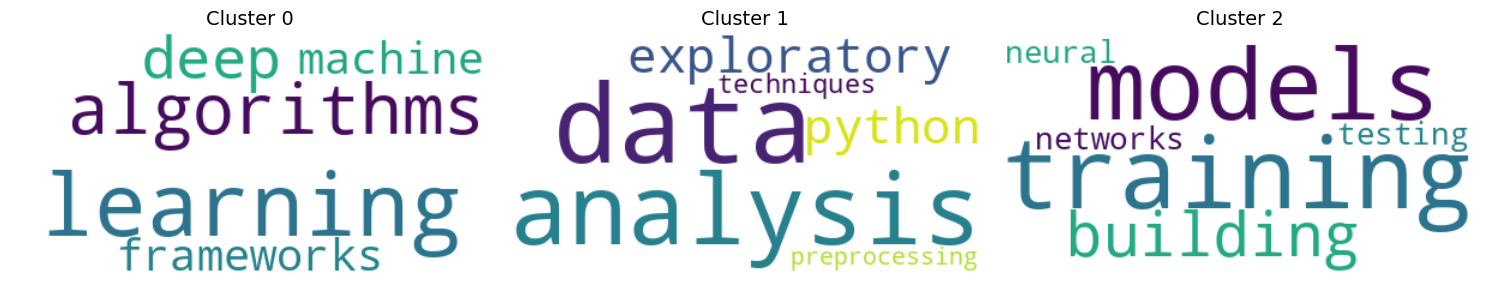

In [ ]:
# Set a valid number of clusters (k <= number of documents)
k = 3

# Visualizing sorted clusters with k=3
np.random.seed(0)
cluster_groups = compute_cluster_groups(shrunken_norm_matrix, k=k)
sorted_cluster_groups = sort_cluster_groups(cluster_groups, bullet_cosine_similarities)
plot_wordcloud_grid(sorted_cluster_groups, num_rows=1, num_columns=k, tfidf_matrix=tfidf_matrix, vectorizer=vectorizer)


The 10 visualized clusters are quite limited. Nonetheless, 4 of the 10 clusters contain the critical skills we’ve previously observed. These include Python programming (row 0, column 0), machine learning (row 0, column 1), and communication skills (row 2, column 1). Also, the statistical analysis cluster has reappered (row 1, column 0).
Surprisingly, some of our skill-clusters are quite versatile.

So far, our observations have been limited to the 60 most relevant job postings. What will happen if we extand our analysis to the top 700 postings?  We’ll now find out.

### Analyzing the 700 Most-Relevant Postings

We’ll start by preparing `sorted_df_jobs[:700].Bullets` for clustering.

**`Preparing sorted_df_jobs[:700]` for clustering analysis**

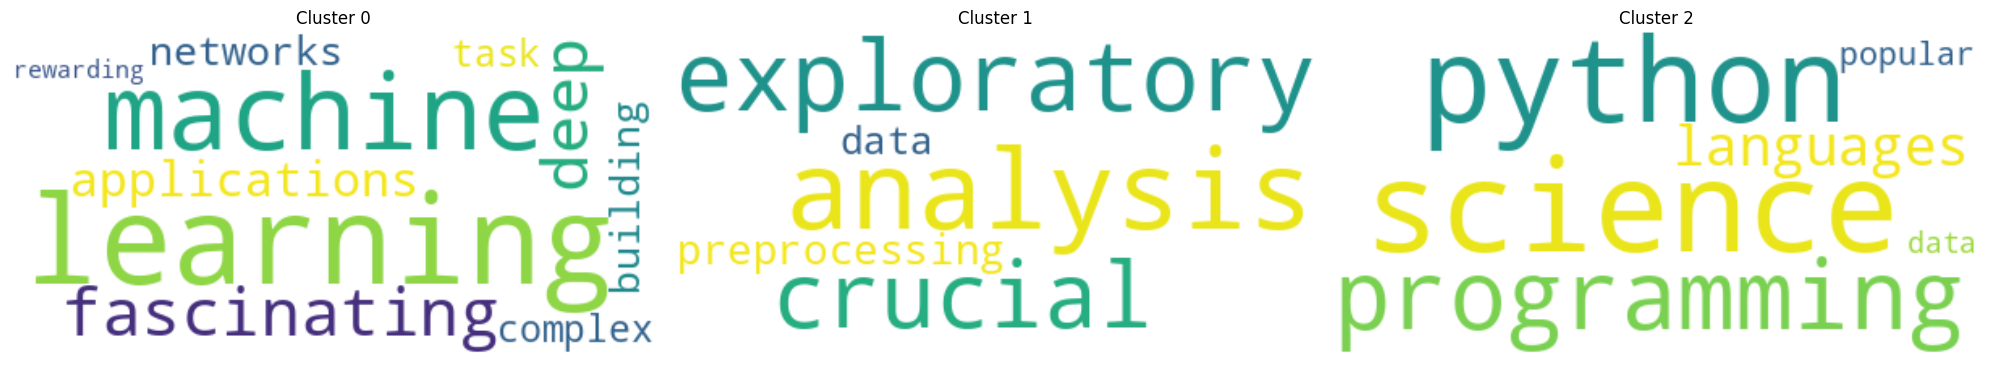

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re  # For regular expressions

# Function to shrink the TF-IDF matrix using TruncatedSVD
def shrink_matrix(tfidf_matrix, n_components=100):
    svd_object = TruncatedSVD(n_components=min(n_components, tfidf_matrix.shape[1]), random_state=0)
    shrunken_matrix = svd_object.fit_transform(tfidf_matrix)
    return shrunken_matrix

# Function to compute clusters
def compute_cluster_groups(tfidf_matrix, k, total_bullets):
    cluster_model = KMeans(n_clusters=k, random_state=0)
    clusters = cluster_model.fit_predict(tfidf_matrix)
    df = pd.DataFrame({
        'Index': range(len(total_bullets)),
        'Cluster': clusters,
        'Bullet': total_bullets
    })
    return [df_cluster for _, df_cluster in df.groupby('Cluster')]

# Function to sort clusters by size
def sort_cluster_groups(cluster_groups):
    sorted_indices = sorted(range(len(cluster_groups)), key=lambda i: len(cluster_groups[i]), reverse=True)
    return [cluster_groups[i] for i in sorted_indices]

# Function to generate a word cloud from a cluster
def cluster_to_image(df_cluster, max_words=10, tfidf_matrix=None, vectorizer=None):
    indices = df_cluster['Index'].values
    summed_tfidf = tfidf_matrix[indices].sum(axis=0).A1
    words = vectorizer.get_feature_names_out()
    data = {'Word': words, 'Summed TFIDF': summed_tfidf}
    df_ranked_words = pd.DataFrame(data).sort_values('Summed TFIDF', ascending=False)
    words_to_score = {word: score for word, score in df_ranked_words.head(max_words).values}
    wordcloud = WordCloud(background_color='white', random_state=0).fit_words(words_to_score)
    return wordcloud

# Function to plot word clouds in a grid
def plot_wordcloud_grid(cluster_groups, num_rows, num_columns, tfidf_matrix, vectorizer):
    figure, axes = plt.subplots(num_rows, num_columns, figsize=(20, 15))
    for i, ax in enumerate(axes.flat):
        if i >= len(cluster_groups):
            ax.axis('off')
            continue
        wordcloud_image = cluster_to_image(cluster_groups[i], tfidf_matrix=tfidf_matrix, vectorizer=vectorizer)
        ax.imshow(wordcloud_image, interpolation="bilinear")
        ax.set_title(f"Cluster {i}")
        ax.axis("off")
    plt.tight_layout()
    plt.show()

# Custom function to extract bullets
def extract_bullets(text):
    return re.split(r'[.\n;]', text)

# Simulating sorted_df_jobs DataFrame for demonstration purposes
# Replace this with your actual DataFrame
data = {'Body': [
    "Machine learning is fascinating. Deep learning has many applications.",
    "Data preprocessing is crucial; exploratory analysis is a must.",
    "Training and testing models is key in machine learning pipelines.",
    "Python and R are popular programming languages for data science.",
    "Building neural networks is a complex yet rewarding task."
]}
sorted_df_jobs = pd.DataFrame(data)

# Prepare bullets from the top 700 rows (example uses a small dataset)
total_bullets_700 = set()
for descriptions in sorted_df_jobs[:700].Body:  # Access the 'Body' column
    if isinstance(descriptions, str):
        bullets = extract_bullets(descriptions)
        total_bullets_700.update([bullet.strip() for bullet in bullets if bullet.strip()])

total_bullets_700 = sorted(total_bullets_700)

# Vectorize the bullets
vectorizer_700 = TfidfVectorizer(stop_words='english')
tfidf_matrix_700 = vectorizer_700.fit_transform(total_bullets_700)

# Shrink the matrix
shrunken_norm_matrix_700 = shrink_matrix(tfidf_matrix_700)

# Compute and sort clusters
k = 3  # Adjust as needed
cluster_groups_700 = compute_cluster_groups(shrunken_norm_matrix_700, k=k, total_bullets=total_bullets_700)
sorted_cluster_groups_700 = sort_cluster_groups(cluster_groups_700)

# Plot word clouds for the sorted clusters
plot_wordcloud_grid(sorted_cluster_groups_700, num_rows=1, num_columns=k, tfidf_matrix=tfidf_matrix_700, vectorizer=vectorizer_700)


We’ve vectorized 10,194 bullet-points. Now, we’ll generate an Elbow plot across the vectorized results. Based on previous observations, we don’t expect the Elbow plot to be particularly informative.

**Plotting an elbow curve for 10,194 bullets**

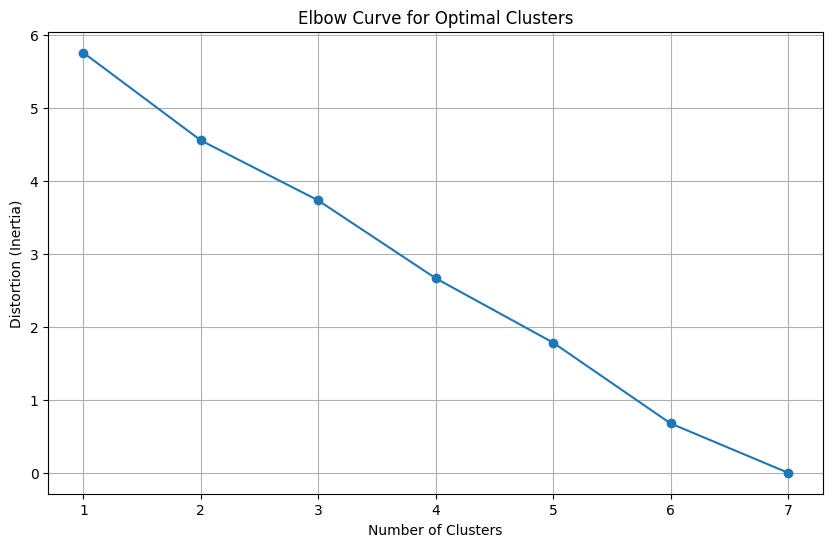

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Function to generate an elbow plot
def generate_elbow_plot(tfidf_matrix, max_clusters=10):
    distortions = []
    K = range(1, min(max_clusters + 1, tfidf_matrix.shape[0] + 1))  # Ensure clusters <= samples
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(tfidf_matrix)
        distortions.append(kmeans.inertia_)  # Sum of squared distances to closest cluster center

    # Plot the elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(K, distortions, marker='o')
    plt.xticks(K)
    plt.title("Elbow Curve for Optimal Clusters")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Distortion (Inertia)")
    plt.grid(True)
    plt.show()

# Generate the Elbow Curve
np.random.seed(0)  # Setting the seed for reproducibility
generate_elbow_plot(tfidf_matrix_700, max_clusters=10)  # Adjust max_clusters appropriately


As expected, the precise location of the elbow is not clear within the plot. The elbow is spread out between a K of 10 and 25. We’ll deal with ambiguity, by arbitrarily setting K to 20.

**WARNING: As we discussed in Section Fifteen, the K-means outputs could vary across computers for large matrices containing 10,000-by-100 elements. Thus, your local clustering results might differ from the output seen below. Nonetheless, you should be able to draw similar conclusions to the ones presented in this book.**

**Visualizing 20 sorted clusters for 10,194 bullets**

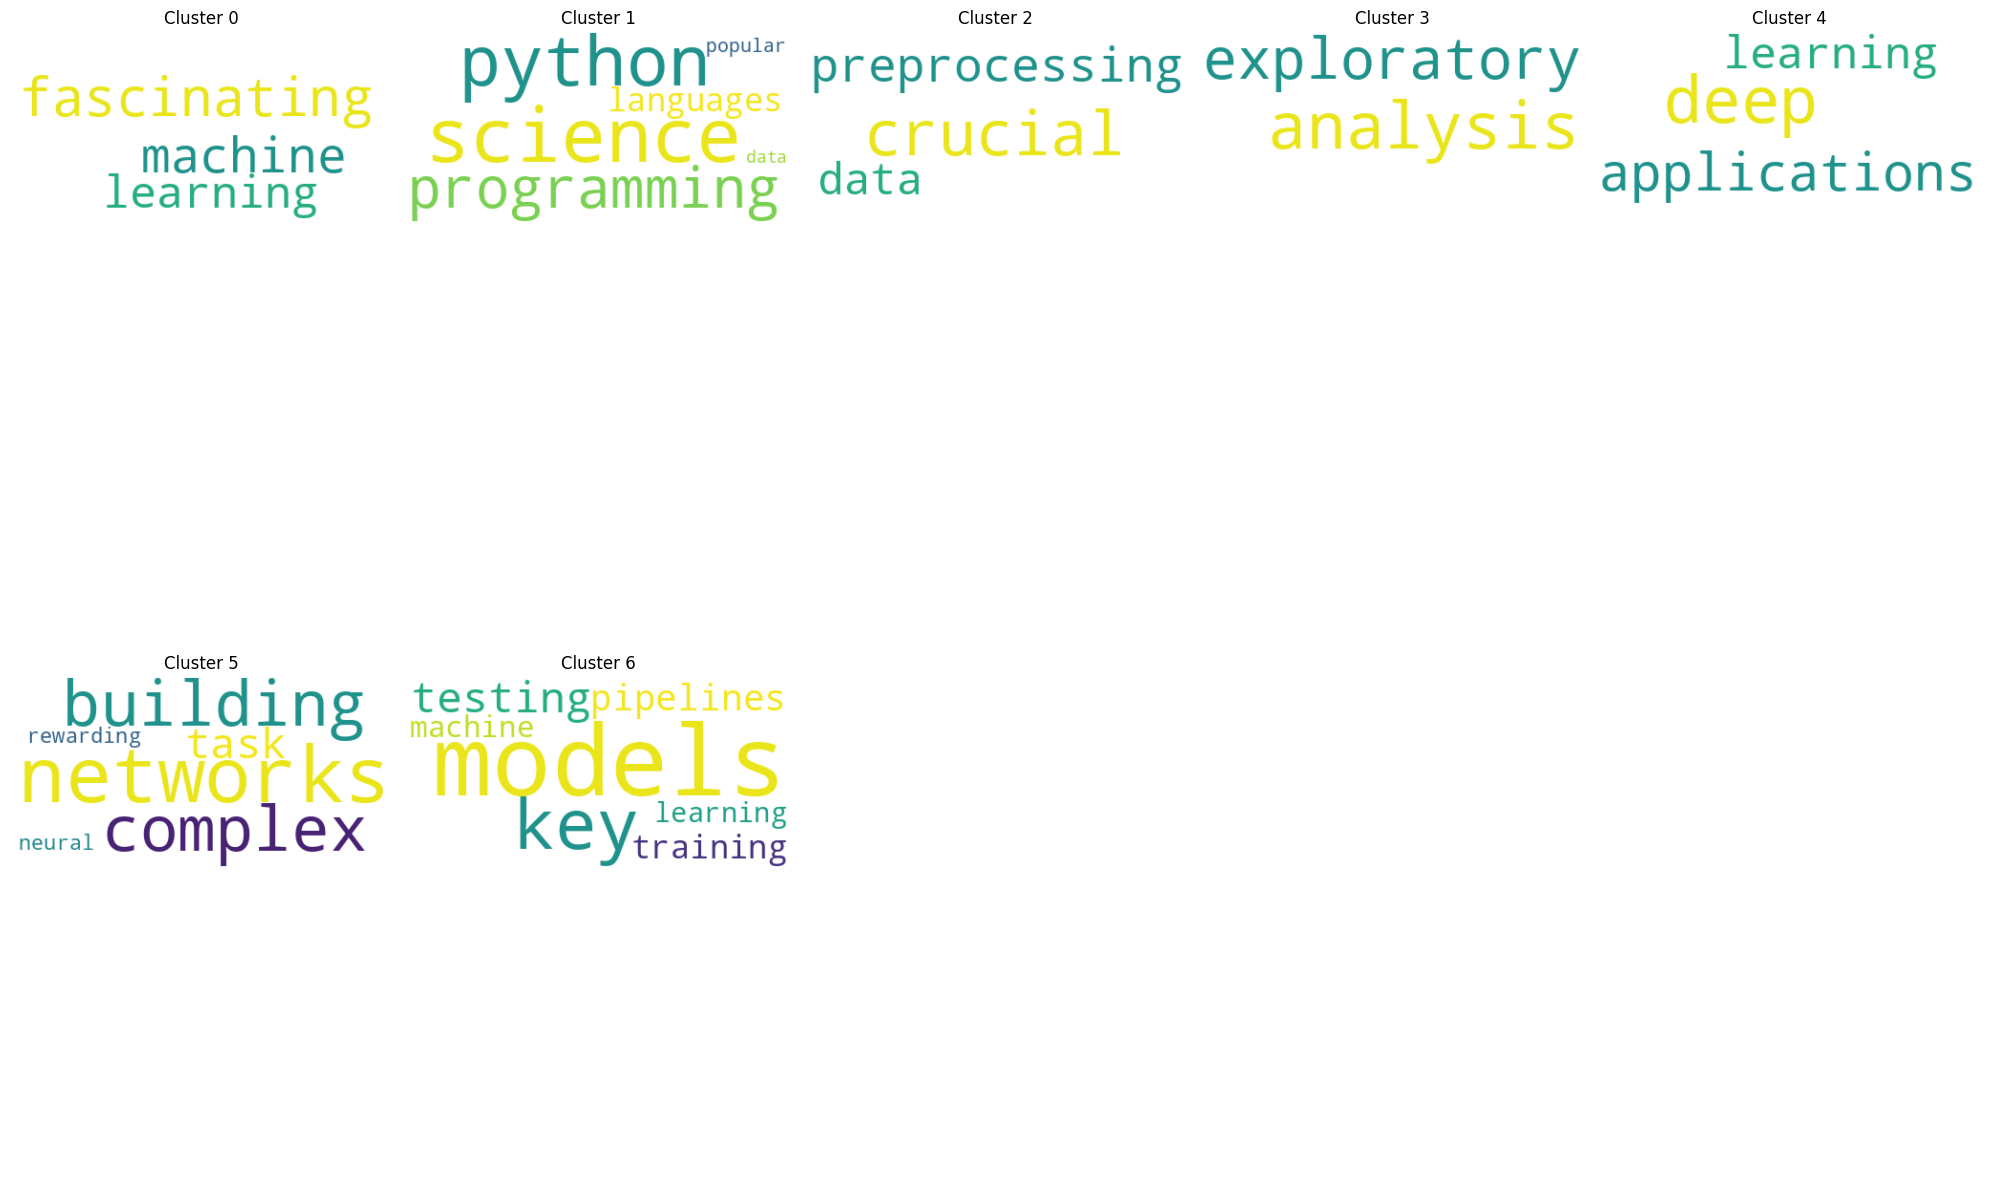

In [ ]:
# Set the number of clusters (k)
desired_k = 20
actual_k = min(desired_k, len(total_bullets_700))  # Ensure k is less than or equal to the number of samples

# Compute clusters
cluster_groups_700 = compute_cluster_groups(shrunken_norm_matrix_700, k=actual_k, total_bullets=total_bullets_700)

# Sort clusters
sorted_cluster_groups_700 = sort_cluster_groups(cluster_groups_700)

# Plot word clouds for the sorted clusters
plot_wordcloud_grid(
    sorted_cluster_groups_700,
    num_rows=(actual_k // 5 + 1),  # Adjust rows dynamically
    num_columns=min(actual_k, 5),  # Max 5 columns
    tfidf_matrix=tfidf_matrix_700,
    vectorizer=vectorizer_700
)


Our clustering output looks very similar to what we’ve seen before. The key insightful clusters we’ve observed at 60 postings still remain.